# Laboratorio 1 - Análisis y Modelado de Datos FutAlpes F.C

**Integrantes:**
- Estudiante 1: Daniela Echavarria Yepes - 202111348
- Estudiante 2: Diego Alejandro Molano Roa - 202123015
- Estudiante 3: Juan Manuel Rodriguez Diaz - 202013372


# Introducción y Objetivo

En este laboratorio se construirá un modelo de regresión para estimar el precio de mercado de jugadores de fútbol 
basado en diversas métricas de rendimiento y características. 

El objetivo es:

- Explorar y entender los datos entregados.  
- Preparar los datos mediante limpieza y preprocesamiento.  
- Construir y entrenar un modelo de regresión.  
- Evaluar cuantitativa y cualitativamente el modelo.  
- Exportar el mejor modelo para su uso en producción. 

## Importación de librerías
Para el análisis de datos utilizamos las librerías **pandas**, **numpy**, **matplotlib**, **seaborn** y **sklearn**.  
Estas herramientas permiten la manipulación de datos, visualización de variables y limpieza eficiente del dataset.



In [1]:
# ====================================
# 1. Importación de librerías
# ====================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import scipy.stats as stats


# Configuración
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


# Carga de datos
Se cargó el archivo `datos_entrenamiento_laboratorio1(train_data).csv` y se exploraron las primeras filas.  
El dataset contiene información de múltiples variables, incluyendo variables numéricas y categóricas.

In [2]:
# ====================================
# 2. Carga de datos
# ====================================
df = pd.read_csv("datos_entrenamiento_laboratorio1(train_data).csv")
print(f"Filas y columnas: {df.shape}")
display(df.head())


Filas y columnas: (57934, 50)


Jugador Nacionalidad Posicion    Edad             Dia_partido  \
0     Bruno Fernandes       pt POR    FW,AM  29-343  Friday August 16, 2024   
1     Marcus Rashford      eng ENG       LW  26-290  Friday August 16, 2024   
2         Amad Diallo       ci CIV       RW  22-036  Friday August 16, 2024   
3         Amad Diallo       ci CIV       RW  22-036  Friday August 16, 2024   
4  Alejandro Garnacho       ar ARG       RW  20-046  Friday August 16, 2024   

   Goles  Tiros Totales   xG  npxG  xAG  xAG.1  Acciones_que_crean_tiros  \
0      0              6  1.2   1.2  0.0    0.0                         2   
1      0              0  0.0   0.0  0.7    0.7                         1   
2      0              0  0.0   0.0  0.1    0.1                         1   
3     -5              0  0.0   0.0  0.1    0.1                         1   
4      0              2  0.7   0.7  0.2    0.2                         3   

   Pases_intentados  Pases_intentados.1  Pases_intentados.2  \
0                60                  60                  60   
1                30                  30                  30   
2                33                  33                  33   
3                33                  33                  33   
4                11                  11                  11   

   Pases_progresivos  Pases_progresivos.1  Regates_exitosos  \
0                  6                    6                 1   
1                  2                    2                 0   
2                  1                    1                 1   
3                  1                    1                 1   
4                  0                    0                 0   

   Regates_exitosos.1  Pases_medios_completados  Pases_largos_completados  \
0                   1                        14                         4   
1                   0                         2                         1   
2                   1                         6                         1   
3                   1                         6                         1   
4                   0                         3                         0   

   xAG.2  xAG.3   xA  Pases_en_ultimo_tercio  Pases_balon_vivo  \
0    0.0    0.0  0.0                       4                51   
1    0.7    0.7  0.1                       2                30   
2    0.1    0.1  0.1                       1                28   
3    0.1    0.1  0.1                       1                28   
4    0.2    0.2  0.1                       0                11   

   Pases_balon_muerto  Pases_al_hueco  Pases_centros  Pases_completados  \
0                   8               0              8                 43   
1                   0               0              1                 22   
2                   4               0              2                 28   
3                   4               0              2                 28   
4                   0               0              1                 10   

   Pases_completados.1  Pases_completados.2  Pases_fuera_de_juego  \
0                   43                   43                     1   
1                   22                   22                     0   
2                   28                   28                     1   
3                   28                   28                     1   
4                   10                   10                     0   

   Valla_no_vencida  Errores_defnsivos_ocasion_tiro  Toques_en_zona_ofensiva  \
0                 0                               0                       36   
1                 1                               0                       26   
2                 0                               0                       22   
3                 0                               0                       22   
4                 1                               0                       10   

   Toques_en_area_rival  %_de_regates_exitosos  Veces_que_fue_barrido_regate  \
0                     3              

# 1. Descripción del entendimiento de datos

En esta sección se describe la estructura inicial del dataset, explorando:
- Dimensiones
- Tipos de variables
- Valores nulos y duplicados
- Estadísticas descriptivas
- Outliers
- Correlaciones

Esto permite identificar problemas de calidad y comprender la información disponible.


## 1.1 Dimensiones del dataset


In [3]:
print("Dimensiones (filas, columnas):", df.shape)
display(df.head())


Dimensiones (filas, columnas): (57934, 50)


Jugador Nacionalidad Posicion    Edad             Dia_partido  \
0     Bruno Fernandes       pt POR    FW,AM  29-343  Friday August 16, 2024   
1     Marcus Rashford      eng ENG       LW  26-290  Friday August 16, 2024   
2         Amad Diallo       ci CIV       RW  22-036  Friday August 16, 2024   
3         Amad Diallo       ci CIV       RW  22-036  Friday August 16, 2024   
4  Alejandro Garnacho       ar ARG       RW  20-046  Friday August 16, 2024   

   Goles  Tiros Totales   xG  npxG  xAG  xAG.1  Acciones_que_crean_tiros  \
0      0              6  1.2   1.2  0.0    0.0                         2   
1      0              0  0.0   0.0  0.7    0.7                         1   
2      0              0  0.0   0.0  0.1    0.1                         1   
3     -5              0  0.0   0.0  0.1    0.1                         1   
4      0              2  0.7   0.7  0.2    0.2                         3   

   Pases_intentados  Pases_intentados.1  Pases_intentados.2  \
0                60                  60                  60   
1                30                  30                  30   
2                33                  33                  33   
3                33                  33                  33   
4                11                  11                  11   

   Pases_progresivos  Pases_progresivos.1  Regates_exitosos  \
0                  6                    6                 1   
1                  2                    2                 0   
2                  1                    1                 1   
3                  1                    1                 1   
4                  0                    0                 0   

   Regates_exitosos.1  Pases_medios_completados  Pases_largos_completados  \
0                   1                        14                         4   
1                   0                         2                         1   
2                   1                         6                         1   
3                   1                         6                         1   
4                   0                         3                         0   

   xAG.2  xAG.3   xA  Pases_en_ultimo_tercio  Pases_balon_vivo  \
0    0.0    0.0  0.0                       4                51   
1    0.7    0.7  0.1                       2                30   
2    0.1    0.1  0.1                       1                28   
3    0.1    0.1  0.1                       1                28   
4    0.2    0.2  0.1                       0                11   

   Pases_balon_muerto  Pases_al_hueco  Pases_centros  Pases_completados  \
0                   8               0              8                 43   
1                   0               0              1                 22   
2                   4               0              2                 28   
3                   4               0              2                 28   
4                   0               0              1                 10   

   Pases_completados.1  Pases_completados.2  Pases_fuera_de_juego  \
0                   43                   43                     1   
1                   22                   22                     0   
2                   28                   28                     1   
3                   28                   28                     1   
4                   10                   10                     0   

   Valla_no_vencida  Errores_defnsivos_ocasion_tiro  Toques_en_zona_ofensiva  \
0                 0                               0                       36   
1                 1                               0                       26   
2                 0                               0                       22   
3                 0                               0                       22   
4                 1                               0                       10   

   Toques_en_area_rival  %_de_regates_exitosos  Veces_que_fue_barrido_regate  \
0                     3              

## 1.2 Tipos de datos y valores nulos


In [4]:
# Tipos y nulos (conteo y %)
resumen_calidad = pd.DataFrame({
    'tipo': df.dtypes.astype(str),
    'n_nulos': df.isna().sum(),
    '%_nulos': (df.isna().mean() * 100).round(2),
    'n_unicos': df.nunique(dropna=True)
}).sort_index()

display(resumen_calidad)

print("\nColumnas con nulos (si aplica):")
display(resumen_calidad[resumen_calidad['n_nulos'] > 0])

tipo  n_nulos  %_nulos  n_unicos
%_de_duelos_aereos_ganados      float64    20957    36.17        79
%_de_regates_exitosos           float64    28722    49.58        54
Acarreos_ultimo_tercio            int64        0     0.00        16
Acciones_que_crean_tiros          int64        0     0.00        16
Centros                           int64        0     0.00        24
Dia_partido                      object        0     0.00       198
Duelos_aereos_ganados             int64        0     0.00        16
Edad                             object       48     0.08      7114
Errores_defnsivos_ocasion_tiro    int64        0     0.00         4
Faltas_cometidas                  int64        0     0.00        10
Goles                             int64        0     0.00        51
Jugador                          object        0     0.00      2242
Malos_controles                   int64        0     0.00        11
Nacionalidad                     object       32     0.06       110
Pases_al_hueco                    int64        0     0.00         6
Pases_balon_muerto                int64        0     0.00        31
Pases_balon_vivo                  int64        0     0.00       143
Pases_centros                     int64        0     0.00        24
Pases_completados                 int64        0     0.00       137
Pases_completados.1               int64        0     0.00       137
Pases_completados.2               int64        0     0.00       137
Pases_en_ultimo_tercio            int64        0     0.00        30
Pases_fuera_de_juego              int64        0     0.00         5
Pases_intentados                  int64        0     0.00       146
Pases_intentados.1                int64        0     0.00       146
Pases_intentados.2                int64        0     0.00       146
Pases_largos_completados          int64        0     0.00        25
Pases_medios_completados          int64        0     0.00        86
Pases_progresivos                 int64        0     0.00        29
Pases_progresivos.1               int64        0     0.00        29
Pases_progresivos_recibidos       int64        0     0.00        32
Pases_recibidos                   int64        0     0.00       135
Perdida_balon                     int64        0     0.00         9
Posicion                         object        0     0.00       452
Regates_exitosos                  int64        0     0.00        14
Regates_exitosos.1                int64        0     0.00        14
Tiros Totales                     int64        0     0.00        12
Toques_en_area_rival              int64        0     0.00        20
Toques_en_zona_ofensiva           int64        0     0.00        79
Valla_no_vencida                  int64        0     0.00        22
Veces_que_fue_barrido_regate      int64        0     0.00        11
contract_date                    object    12916    22.29        11
market_value                     object    12894    22.26        95
npxG                            float64        0     0.00        26
xA                              float64        0     0.00        15
xAG                             float64        0     0.00        20
xAG.1                           float64        0     0.00        20
xAG.2                           float64        0     0.00        20
xAG.3                           float64        0     0.00        20
xG                              float64        0     0.00        27


Columnas con nulos (si aplica):


tipo  n_nulos  %_nulos  n_unicos
%_de_duelos_aereos_ganados  float64    20957    36.17        79
%_de_regates_exitosos       float64    28722    49.58        54
Edad                         object       48     0.08      7114
Nacionalidad                 object       32     0.06       110
contract_date                object    12916    22.29        11
market_value                 object    12894    22.26        95

## 1.3 Estadísticas descriptivas (media, desviación, percentiles, moda)


In [5]:
# Numéricas con percentiles detallados
desc_num = df.select_dtypes(include='number').describe(
    percentiles=[.01, .05, .25, .5, .75, .95, .99]
).T
display(desc_num)

# Categóricas: conteo de categorías y la más frecuente
cats = df.select_dtypes(include=['object','category','bool'])
if cats.shape[1] > 0:
    top_cat = pd.DataFrame({
        'n_unicos': cats.nunique(dropna=True),
        'top': cats.mode(dropna=True).iloc[0],
        'freq_top': cats.apply(lambda s: s.value_counts(dropna=True).iloc[0] if s.notna().any() else np.nan)
    })
    display(top_cat)

# Moda general (puede haber múltiples; se muestra la primera fila)
try:
    moda = df.mode(dropna=True).head(1).T.rename(columns={0:'moda'})
    display(moda)
except Exception as e:
    print("No fue posible calcular la moda:", e)


count       mean        std  min   1%   5%  \
Goles                           57934.0   0.513015  16.440600 -5.0  0.0  0.0   
Tiros Totales                   57934.0   0.792402   1.158538  0.0  0.0  0.0   
xG                              57934.0   0.088635   0.209810  0.0  0.0  0.0   
npxG                            57934.0   0.080473   0.186549  0.0  0.0  0.0   
xAG                             57934.0   0.062784   0.152033  0.0  0.0  0.0   
xAG.1                           57934.0   0.062784   0.152033  0.0  0.0  0.0   
Acciones_que_crean_tiros        57934.0   1.416750   1.727395  0.0  0.0  0.0   
Pases_intentados                57934.0  31.659716  22.963272  0.0  0.0  3.0   
Pases_intentados.1              57934.0  31.659716  22.963272  0.0  0.0  3.0   
Pases_intentados.2              57934.0  31.659716  22.963272  0.0  0.0  3.0   
Pases_progresivos               57934.0   2.416232   2.756341  0.0  0.0  0.0   
Pases_progresivos.1             57934.0   2.416232   2.756341  0.0  0.0  0.0   
Regates_exitosos                57934.0   0.487451   0.897683  0.0  0.0  0.0   
Regates_exitosos.1              57934.0   0.487451   0.897683  0.0  0.0  0.0   
Pases_medios_completados        57934.0  11.226309  10.984869  0.0  0.0  0.0   
Pases_largos_completados        57934.0   2.341941   2.867533  0.0  0.0  0.0   
xAG.2                           57934.0   0.062784   0.152033  0.0  0.0  0.0   
xAG.3                           57934.0   0.062784   0.152033  0.0  0.0  0.0   
xA                              57934.0   0.055056   0.122355  0.0  0.0  0.0   
Pases_en_ultimo_tercio          57934.0   1.976232   2.583320  0.0  0.0  0.0   
Pases_balon_vivo                57934.0  28.593900  21.511297  0.0  0.0  2.0   
Pases_balon_muerto              57934.0   2.956140   3.733981  0.0  0.0  0.0   
Pases_al_hueco                  57934.0   0.096196   0.342576  0.0  0.0  0.0   
Pases_centros                   57934.0   1.133652   2.005869  0.0  0.0  0.0   
Pases_completados               57934.0  25.745624  20.703206  0.0  0.0  2.0   
Pases_completados.1             57934.0  25.745624  20.703206  0.0  0.0  2.0   
Pases_completados.2             57934.0  25.745624  20.703206  0.0  0.0  2.0   
Pases_fuera_de_juego            57934.0   0.109677   0.345491  0.0  0.0  0.0   
Valla_no_vencida                57934.0   1.502727   2.169317  0.0  0.0  0.0   
Errores_defnsivos_ocasion_tiro  57934.0   0.041513   0.207865  0.0  0.0  0.0   
Toques_en_zona_ofensiva         57934.0   9.201091   9.322087  0.0  0.0  0.0   
Toques_en_area_rival            57934.0   1.410950   1.957006  0.0  0.0  0.0   
%_de_regates_exitosos           29212.0  43.171587  40.232967  0.0  0.0  0.0   
Veces_que_fue_barrido_regate    57934.0   0.534522   0.934409  0.0  0.0  0.0   
Acarreos_ultimo_tercio          57934.0   0.801809   1.210875  0.0  0.0  0.0   
Malos_controles                 57934.0   0.950133   1.221368  0.0  0.0  0.0   
Perdida_balon                   57934.0   0.574033   0.931852  0.0  0.0  0.0   
Pases_recibidos                 57934.0  25.518383  19.001270  0.0  0.0  2.0   
Pases_progresivos_recibidos     57934.0   2.382470   3.158174  0.0  0.0  0.0   
Faltas_cometidas                57934.0   0.781337   1.005105  0.0  0.0  0.0   
Centros                         57934.0   1.133652   2.005869  0.0  0.0  0.0   
Duelos_aereos_ganados           57934.0   0.834795   1.305149  0.0  0.0  0.0   
%_de_duelos_aereos_ganados      36977.0  48.814187  39.560765  0.0  0.0  0.0   

                                 25%   50%    75%     95%    99%    max  
Goles                            0.0   0.0    0.0    1.00    1.0  995.0  
Tiros Totales                    0.0   0.0    1.0    3.00    5.0   12.0  
xG                               0.0   0.0    0.1    0.50    1.0    2.9  
npxG                             0.0   0.0    0.1    0.40    0.9    2.9  
xAG                              0.0   0.0    0.1    0.40    0.8    2.1  
xAG.1                            0.0   0.0    0.1    0.40    0.8    2

n_unicos                    top  freq_top
Jugador            2242                Vitinha       166
Nacionalidad        110                 fr FRA      9351
Posicion            452                     CB      9537
Edad               7114                 24-231        37
Dia_partido         198  Saturday May 10, 2025       997
market_value         95                 €5.00m      2332
contract_date        11             30.06.2028     11316

moda
Jugador                                       Vitinha
Nacionalidad                                   fr FRA
Posicion                                           CB
Edad                                           24-231
Dia_partido                     Saturday May 10, 2025
Goles                                               0
Tiros Totales                                       0
xG                                                0.0
npxG                                              0.0
xAG                                               0.0
xAG.1                                             0.0
Acciones_que_crean_tiros                            0
Pases_intentados                                    4
Pases_intentados.1                                  4
Pases_intentados.2                                  4
Pases_progresivos                                   0
Pases_progresivos.1                                 0
Regates_exitosos                                    0
Regates_exitosos.1                                  0
Pases_medios_completados                            1
Pases_largos_completados                            0
xAG.2                                             0.0
xAG.3                                             0.0
xA                                                0.0
Pases_en_ultimo_tercio                              0
Pases_balon_vivo                                    4
Pases_balon_muerto                                  0
Pases_al_hueco                                      0
Pases_centros                                       0
Pases_completados                                   3
Pases_completados.1                                 3
Pases_completados.2                                 3
Pases_fuera_de_juego                                0
Valla_no_vencida                                    0
Errores_defnsivos_ocasion_tiro                      0
Toques_en_zona_ofensiva                             0
Toques_en_area_rival                                0
%_de_regates_exitosos                             0.0
Veces_que_fue_barrido_regate                        0
Acarreos_ultimo_tercio                              0
Malos_controles                                     0
Perdida_balon                                       0
Pases_recibidos                                    15
Pases_progresivos_recibidos                         0
Faltas_cometidas                                    0
Centros                                             0
Duelos_aereos_ganados                               0
%_de_duelos_aereos_ganados                        0.0
market_value                                   €5.00m
contract_date                              30.06.2028

### Justificación de la elección de la posición más frecuente (moda)

Elegimos usar la **posición más frecuente (moda)** porque en el dataset los jugadores tienen múltiples registros por partidos/fechas, y es fundamental definir una única posición representativa para:

- **Evitar ruido y duplicados.**
- **Resumir correctamente el rol del jugador.**
- **Tomar mejores decisiones en el modelado y selección de fichajes.**

Además, es una técnica simple, reproducible y acorde al objetivo del club.


## 1.4 Variables numéricas y categóricas


In [6]:
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()
dt_cols  = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

print(f"Numéricas ({len(num_cols)}):", num_cols)
print(f"Categóricas ({len(cat_cols)}):", cat_cols)
print(f"Fechas/tiempo ({len(dt_cols)}):", dt_cols)


Numéricas (43): ['Goles', 'Tiros Totales', 'xG', 'npxG', 'xAG', 'xAG.1', 'Acciones_que_crean_tiros', 'Pases_intentados', 'Pases_intentados.1', 'Pases_intentados.2', 'Pases_progresivos', 'Pases_progresivos.1', 'Regates_exitosos', 'Regates_exitosos.1', 'Pases_medios_completados', 'Pases_largos_completados', 'xAG.2', 'xAG.3', 'xA', 'Pases_en_ultimo_tercio', 'Pases_balon_vivo', 'Pases_balon_muerto', 'Pases_al_hueco', 'Pases_centros', 'Pases_completados', 'Pases_completados.1', 'Pases_completados.2', 'Pases_fuera_de_juego', 'Valla_no_vencida', 'Errores_defnsivos_ocasion_tiro', 'Toques_en_zona_ofensiva', 'Toques_en_area_rival', '%_de_regates_exitosos', 'Veces_que_fue_barrido_regate', 'Acarreos_ultimo_tercio', 'Malos_controles', 'Perdida_balon', 'Pases_recibidos', 'Pases_progresivos_recibidos', 'Faltas_cometidas', 'Centros', 'Duelos_aereos_ganados', '%_de_duelos_aereos_ganados']
Categóricas (7): ['Jugador', 'Nacionalidad', 'Posicion', 'Edad', 'Dia_partido', 'market_value', 'contract_date']
Fe

## 1.5 Distribución de Variables Numéricas

<Figure size 2000x2000 with 0 Axes>

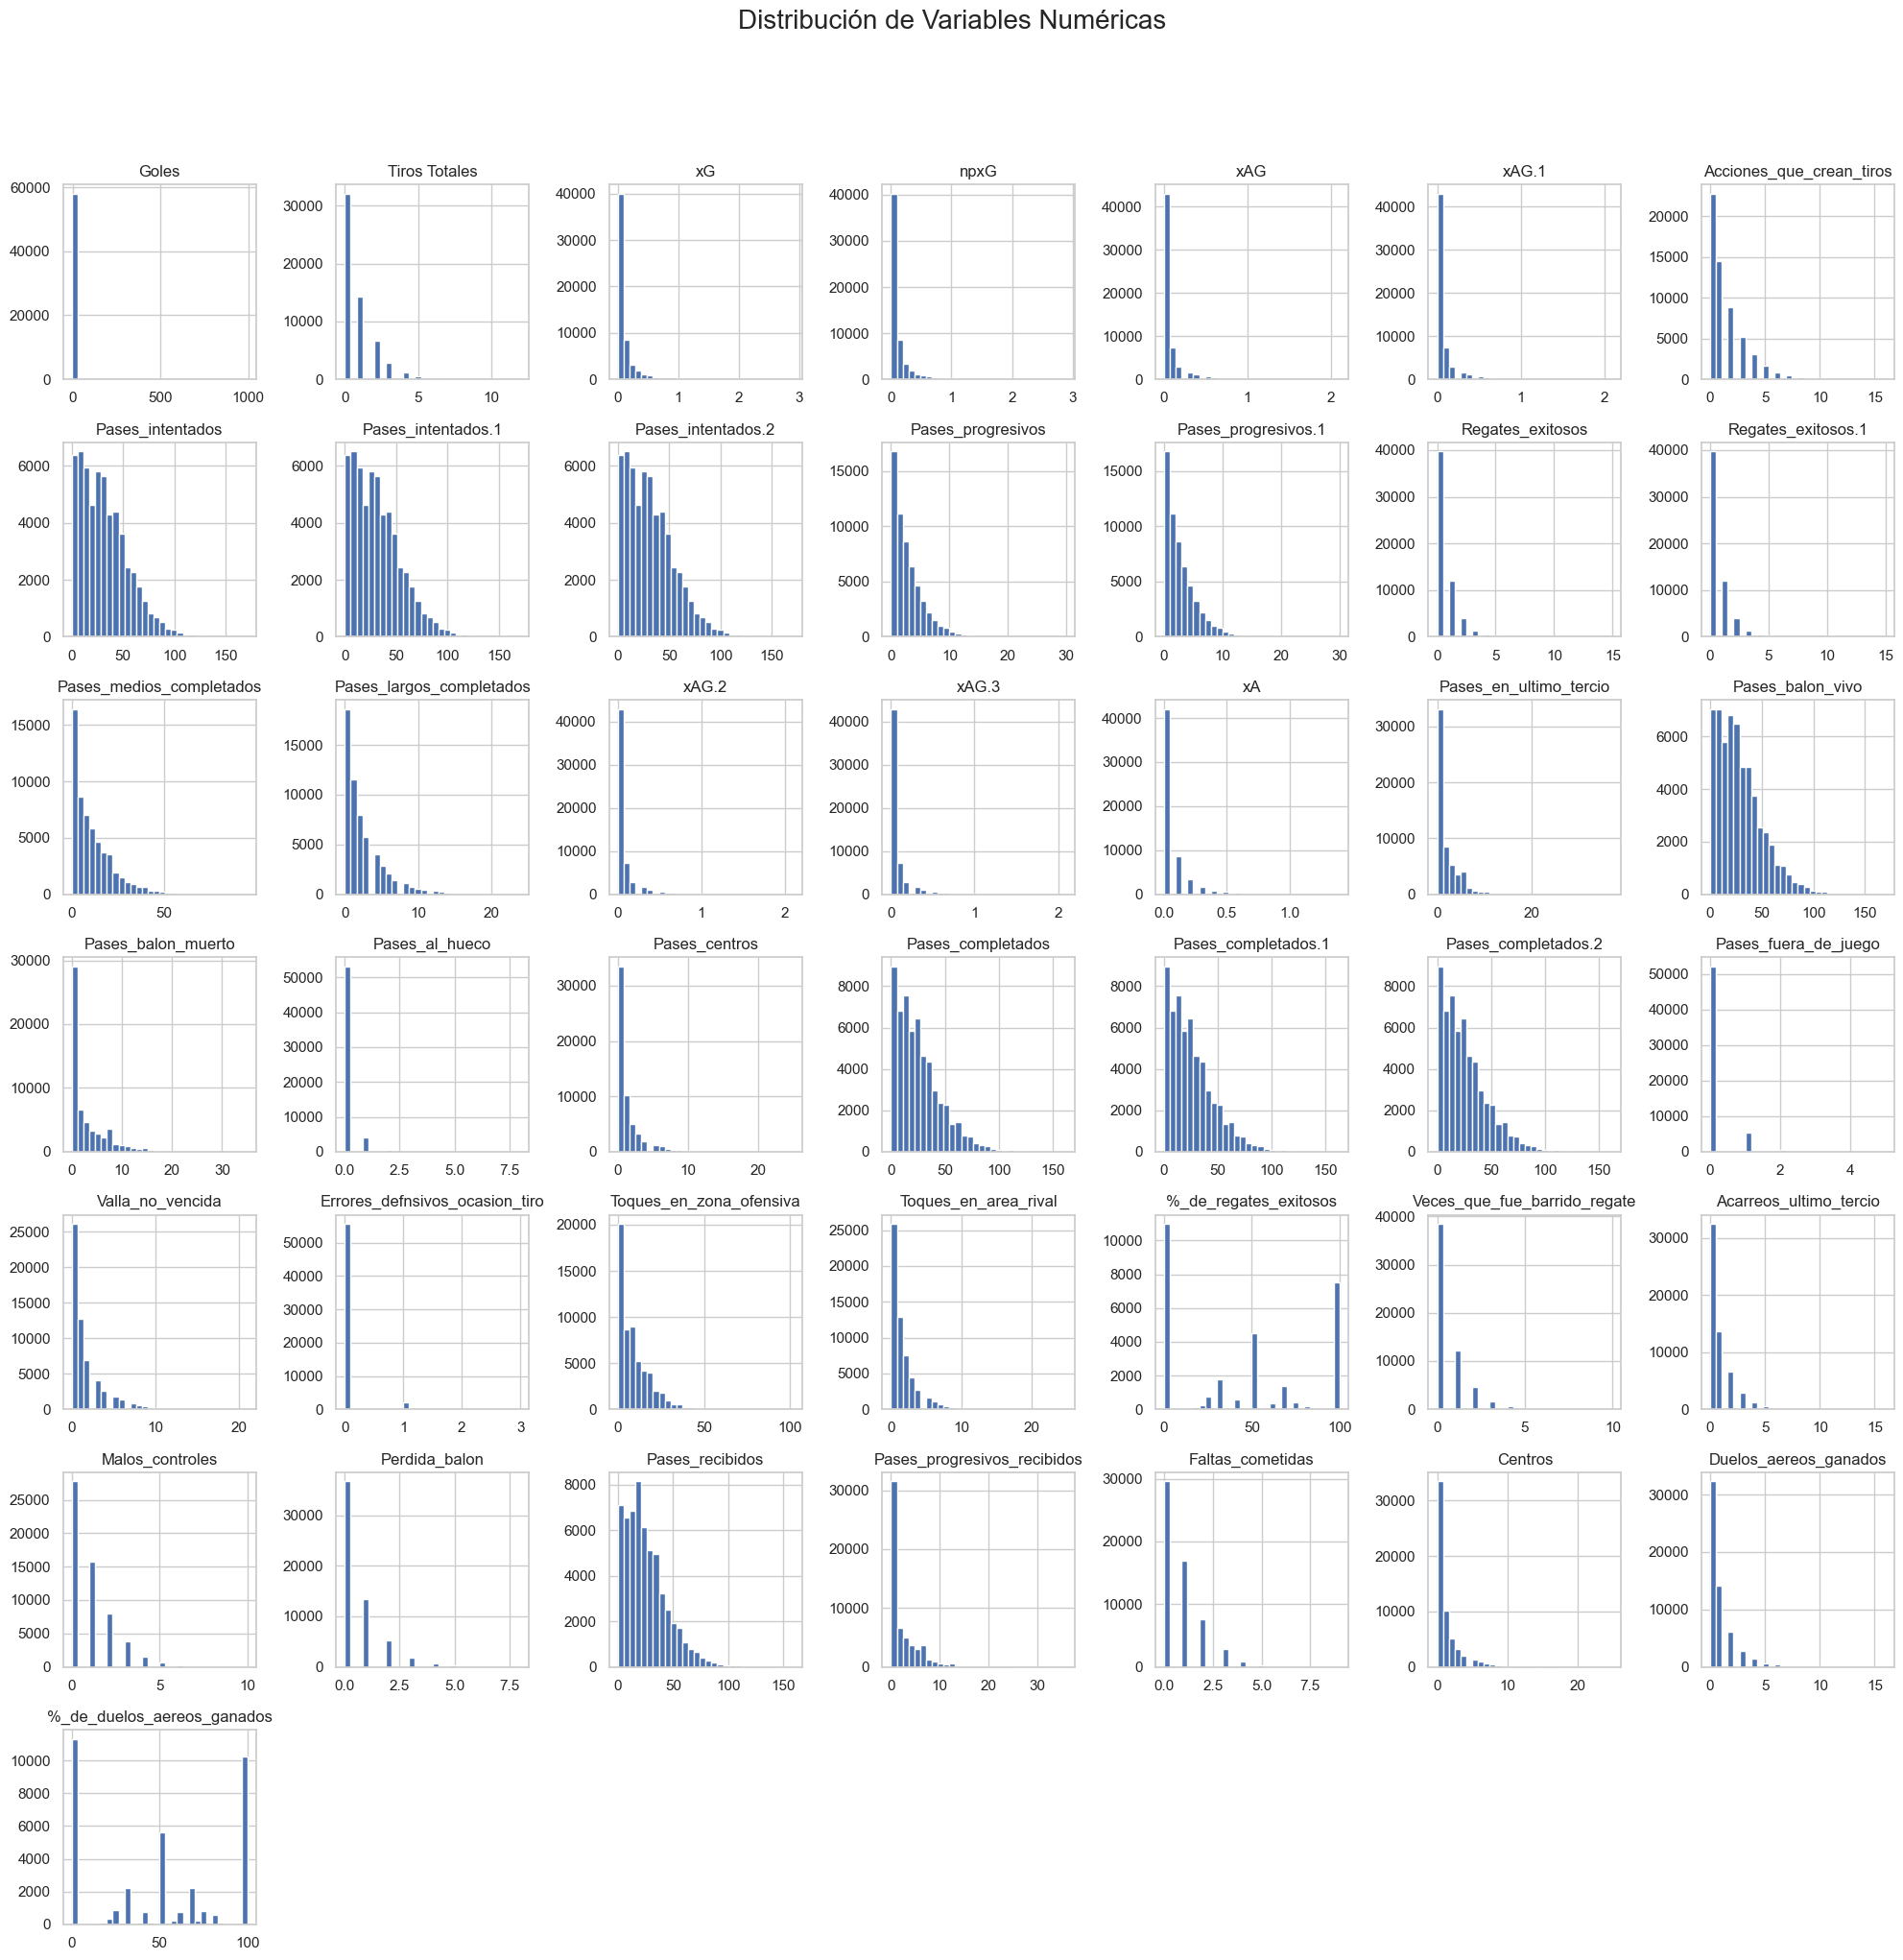

In [7]:
# Histogramas para atributos numéricos

fig = plt.figure(figsize=(20, 20))
df[num_cols].hist(bins=30, figsize=(20, 20))
plt.suptitle("Distribución de Variables Numéricas", fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Las distribuciones de las variables numéricas muestran que la mayoría de los valores están muy concentrados en cero y solo unos pocos casos alcanzan cifras altas, lo que genera una fuerte asimetría hacia la derecha. Esto ocurre principalmente en las métricas ofensivas como goles, tiros, goles esperados, asistencias esperadas y centros. 

En contraste, variables relacionadas con pases y toques presentan mayor dispersión aunque también con sesgo hacia valores bajos. Finalmente, las variables expresadas en porcentaje, como éxito en regates o duelos aéreos, muestran una distribución más equilibrada en todo el rango de valores. En conjunto, los datos reflejan la realidad del fútbol: muchos jugadores participan poco en métricas destacadas y unos pocos concentran el rendimiento, lo que explica la gran cantidad de valores atípicos observados.

## 1.6 Outliers (IQR y boxplots)


Tabla de outliers por variable:


Q1     Q3    IQR  lim_inf  lim_sup  \
Pases_centros                    0.0    1.0    1.0    -1.50     2.50   
Centros                          0.0    1.0    1.0    -1.50     2.50   
Malos_controles                  0.0    1.0    1.0    -1.50     2.50   
xG                               0.0    0.1    0.1    -0.15     0.25   
npxG                             0.0    0.1    0.1    -0.15     0.25   
Pases_fuera_de_juego             0.0    0.0    0.0     0.00     0.00   
Duelos_aereos_ganados            0.0    1.0    1.0    -1.50     2.50   
Acarreos_ultimo_tercio           0.0    1.0    1.0    -1.50     2.50   
Tiros Totales                    0.0    1.0    1.0    -1.50     2.50   
Pases_al_hueco                   0.0    0.0    0.0     0.00     0.00   
xAG.1                            0.0    0.1    0.1    -0.15     0.25   
xAG.2                            0.0    0.1    0.1    -0.15     0.25   
xAG.3                            0.0    0.1    0.1    -0.15     0.25   
xAG                              0.0    0.1    0.1    -0.15     0.25   
Goles                            0.0    0.0    0.0     0.00     0.00   
Faltas_cometidas                 0.0    1.0    1.0    -1.50     2.50   
xA                               0.0    0.1    0.1    -0.15     0.25   
Pases_largos_completados         0.0    3.0    3.0    -4.50     7.50   
Valla_no_vencida                 0.0    2.0    2.0    -3.00     5.00   
Pases_balon_muerto               0.0    4.0    4.0    -6.00    10.00   
Toques_en_area_rival             0.0    2.0    2.0    -3.00     5.00   
Perdida_balon                    0.0    1.0    1.0    -1.50     2.50   
Veces_que_fue_barrido_regate     0.0    1.0    1.0    -1.50     2.50   
Pases_medios_completados         3.0   16.0   13.0   -16.50    35.50   
Pases_en_ultimo_tercio           0.0    3.0    3.0    -4.50     7.50   
Errores_defnsivos_ocasion_tiro   0.0    0.0    0.0     0.00     0.00   
Regates_exitosos                 0.0    1.0    1.0    -1.50     2.50   
Regates_exitosos.1               0.0    1.0    1.0    -1.50     2.50   
Acciones_que_crean_tiros         0.0    2.0    2.0    -3.00     5.00   
Pases_progresivos_recibidos      0.0    4.0    4.0    -6.00    10.00   
Toques_en_zona_ofensiva          2.0   14.0   12.0   -16.00    32.00   
Pases_recibidos                 11.0   36.0   25.0   -26.50    73.50   
Pases_balon_vivo                12.0   40.0   28.0   -30.00    82.00   
Pases_completados                9.0   37.0   28.0   -33.00    79.00   
Pases_completados.1              9.0   37.0   28.0   -33.00    79.00   
Pases_completados.2              9.0   37.0   28.0   -33.00    79.00   
Pases_progresivos.1              0.0    4.0    4.0    -6.00    10.00   
Pases_progresivos                0.0    4.0    4.0    -6.00    10.00   
Pases_intentados                13.0   45.0   32.0   -35.00    93.00   
Pases_intentados.2              13.0   45.0   32.0   -35.00    93.00   
Pases_intentados.1              13.0   45.0   32.0   -35.00    93.00   
%_de_regates_exitosos            0.0  100.0  100.0  -150.00   250.00   
%_de_duelos_aereos_ganados       0.0  100.0  100.0  -150.00   250.00   

                                n_outliers  %_outliers  
Pases_centros                       9183.0   15.850796  
Centros                             9183.0   15.850796  
Malos_controles                     6369.0   10.993544  
xG                                  6266.0   10.815756  
npxG                                5872.0   10.135672  
Pases_fuera_de_juego                5780.0    9.976870  
Duelos_aereos_ganados               5533.0    9.550523  
Acarreos_ultimo_tercio              5157.0    8.901509  
Tiros Totales                       4926.0    8.502779  
Pases_al_hueco                      4838.0    8.350882  
xAG.1                               4766.0    8.226603  
xAG.2                               4766.0    8.226603  
xAG.3                               4766.0    8.226603  
xAG                                 4766.0    8.226603  
Goles     

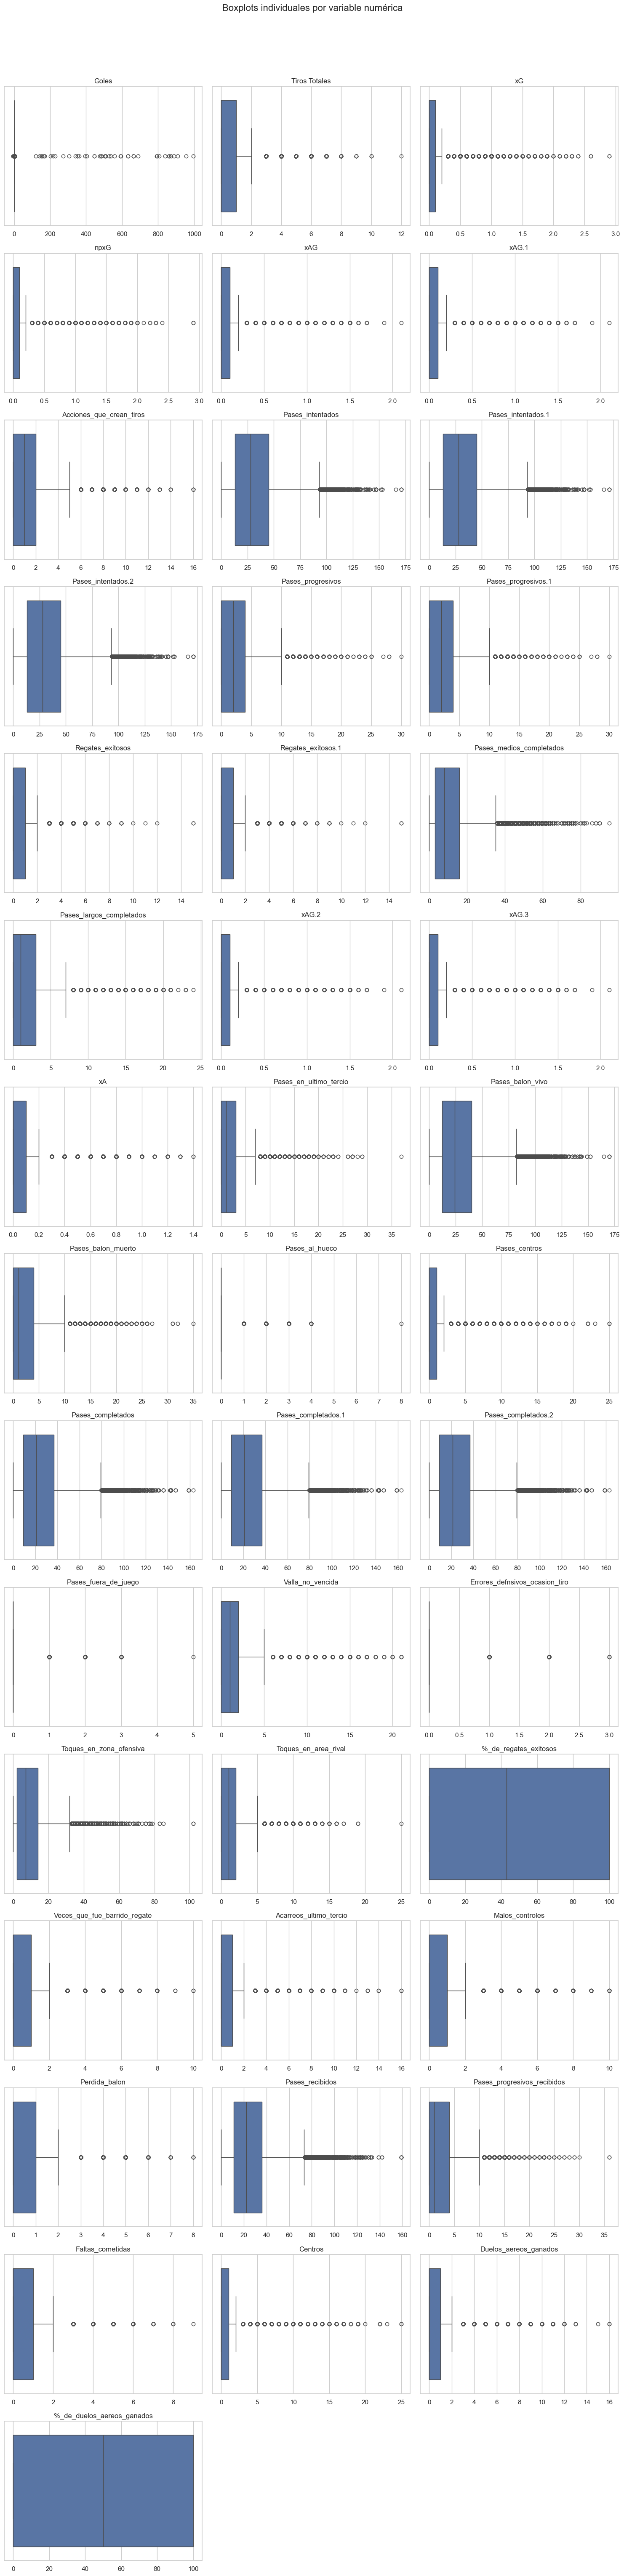

In [8]:
# ==========================================
# Outliers por IQR + Boxplots individuales
# ==========================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Función para calcular estadísticas de outliers por IQR
def outlier_stats(s: pd.Series):
    s = s.dropna()
    if s.empty: 
        return pd.Series({'Q1':np.nan, 'Q3':np.nan, 'IQR':np.nan, 
                          'lim_inf':np.nan, 'lim_sup':np.nan, 
                          'n_outliers':0, '%_outliers':0.0})
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5*iqr
    lim_sup = q3 + 1.5*iqr
    n_out = ((s < lim_inf) | (s > lim_sup)).sum()
    pct_out = 100 * n_out / s.size
    return pd.Series({'Q1':q1, 'Q3':q3, 'IQR':iqr, 
                      'lim_inf':lim_inf, 'lim_sup':lim_sup, 
                      'n_outliers':n_out, '%_outliers':pct_out})

# Seleccionamos variables numéricas
num_df = df.select_dtypes(include='number')

if num_df.shape[1] > 0:
    # Tabla de outliers
    tabla_outliers = num_df.apply(outlier_stats, axis=0).T.sort_values('%_outliers', ascending=False)
    print("Tabla de outliers por variable:")
    display(tabla_outliers)

    # Boxplots individuales en grilla
    n = len(num_df.columns)
    ncols = 3
    nrows = int(np.ceil(n / ncols))

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4*nrows))
    axes = axes.flatten()

    for i, col in enumerate(num_df.columns):
        sns.boxplot(x=num_df[col], ax=axes[i], showfliers=True)
        axes[i].set_title(col, fontsize=12)
        axes[i].set_xlabel("")  

    # Desactivar ejes vacíos
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    fig.suptitle("Boxplots individuales por variable numérica", y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("No hay variables numéricas para evaluar outliers.")


## 1.7 Relaciones con Variable Objetivo

In [9]:

def parse_market_value(val):
    try:
        if pd.isna(val):
            return np.nan
        val = str(val).replace("€", "").replace(",", "").strip().lower()

        if val in ["-", "", "nan", "none", "error"]:
            return np.nan

        if val.endswith("m"):   # millones
            return float(val[:-1]) * 1e6
        elif val.endswith("k"): # miles
            return float(val[:-1]) * 1e3
        else:                   # número plano
            return float(val)
    except:
        return np.nan

# Aplicar al DataFrame
df["market_value_num"] = df["market_value"].apply(parse_market_value)

# Escalamos en millones para visualización
df["market_value_millions"] = df["market_value_num"] / 1e6

print(df[["market_value", "market_value_num", "market_value_millions"]].head())


  market_value  market_value_num  market_value_millions
0      €50.00m      5.000000e+07                   50.0
1      €50.00m      5.000000e+07                   50.0
2            -               NaN                    NaN
3    €1000.00m      1.000000e+09                 1000.0
4      €45.00m      4.500000e+07                   45.0


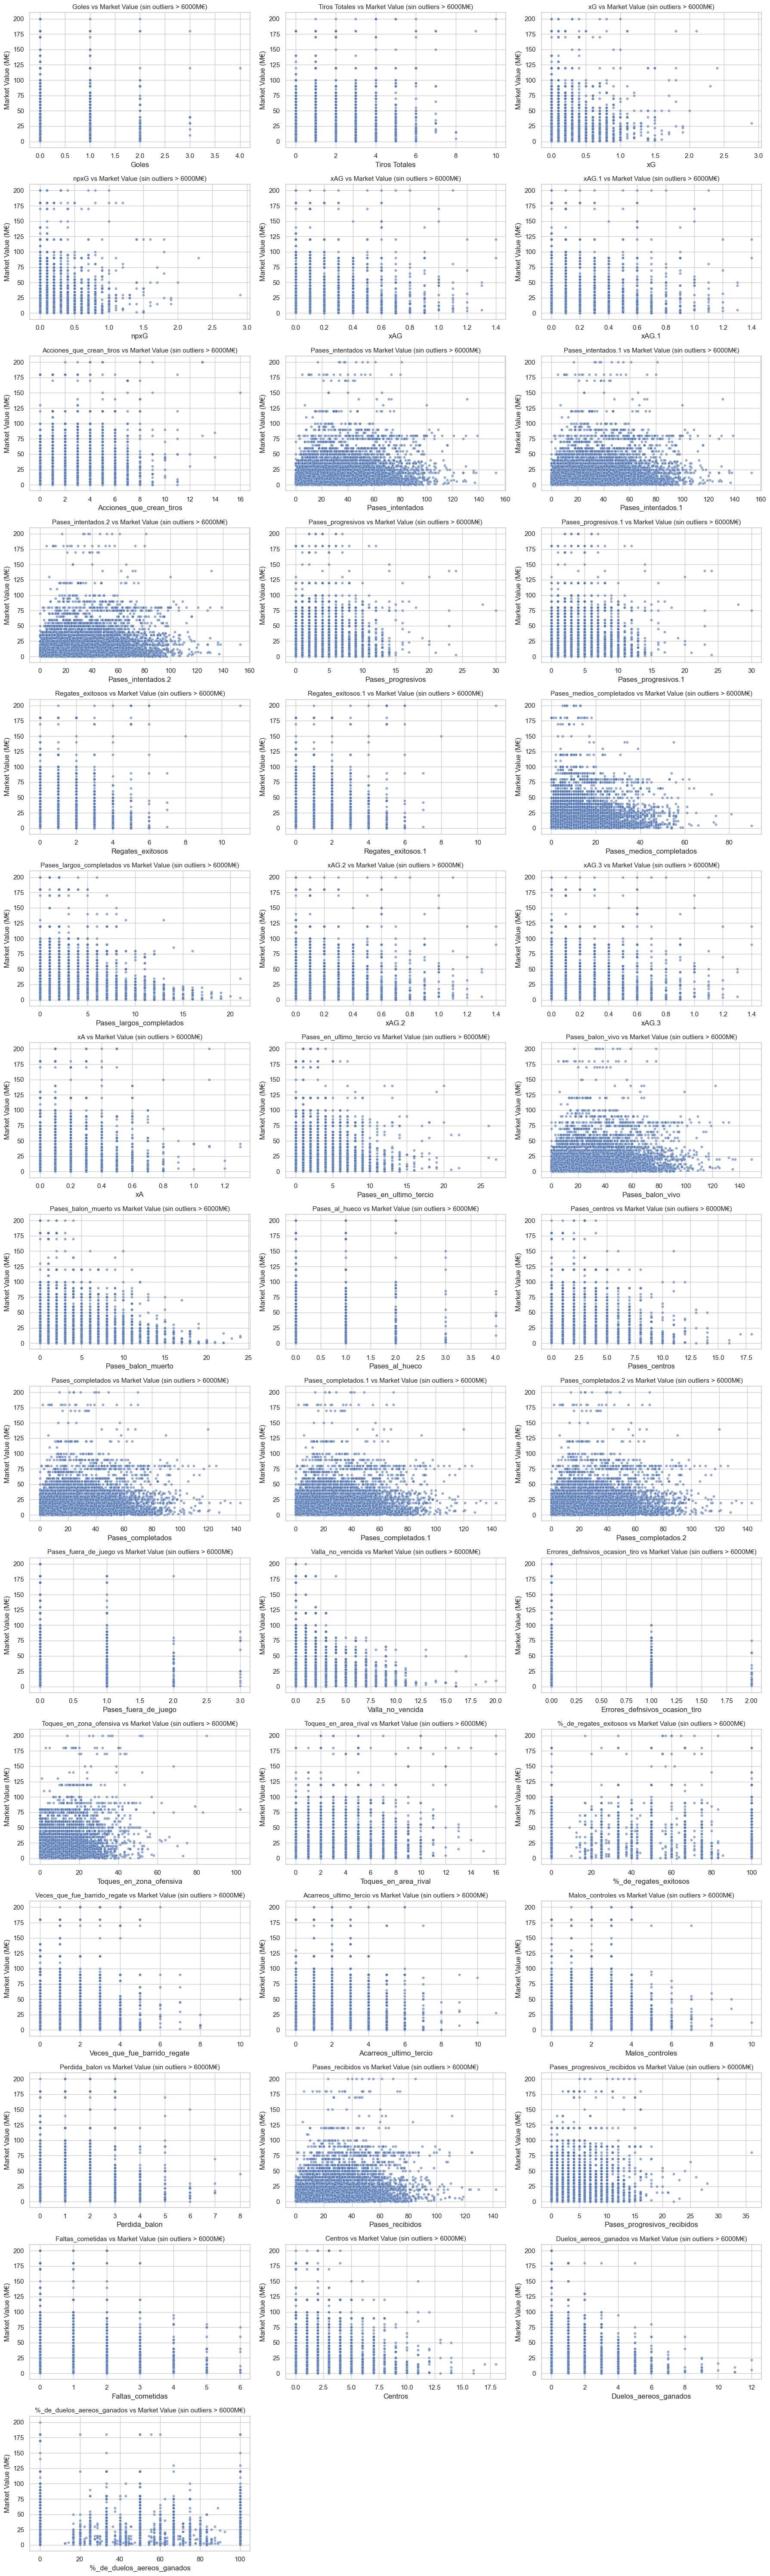

In [10]:
# Filtrar: eliminar valores de market_value_millions mayores a 6000
df_filtrado = df[df["market_value_millions"] < 6000]

# Definir número de columnas y filas para la grilla
n = len(num_cols)
ncols = 3   # puedes cambiarlo a 2 o 4 según lo que prefieras
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*ncols, 4*nrows))
axes = axes.flatten()

# Graficar scatterplots
for i, col in enumerate(num_cols):
    sns.scatterplot(
        data=df_filtrado.sample(frac=0.2, random_state=42), 
        x=col, 
        y="market_value_millions",
        s=20, alpha=0.6, ax=axes[i]
    )
    axes[i].set_title(f"{col} vs Market Value (sin outliers > 6000M€)", fontsize=11)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Market Value (M€)")

# Desactivar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


## 1.8 Correlación (heatmap y pares fuertemente correlacionados)


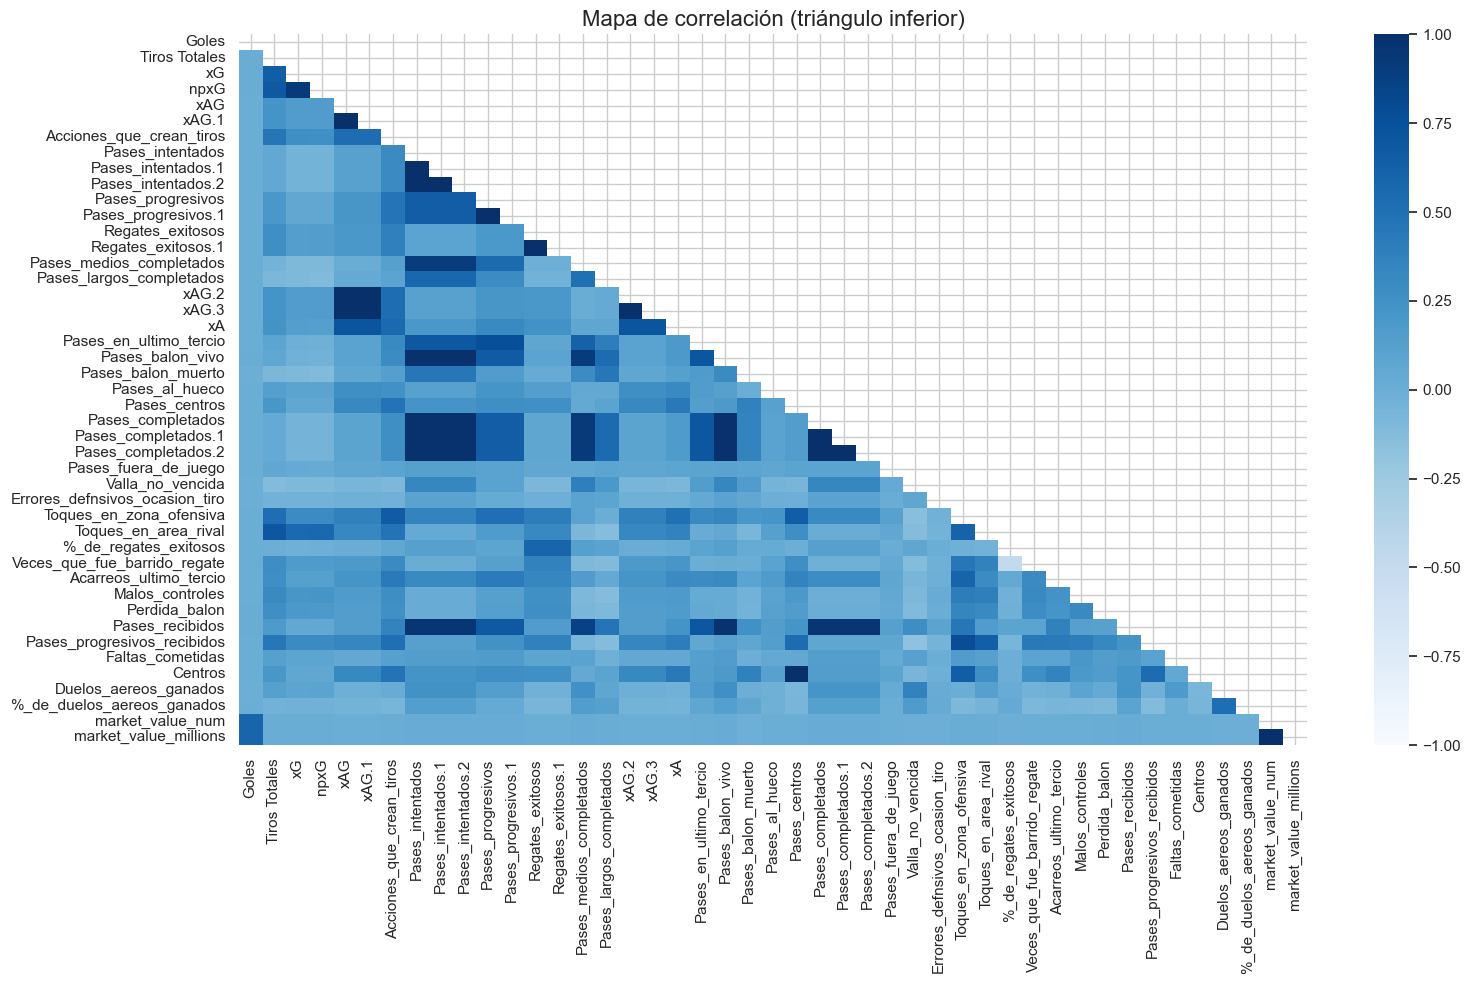

Pares con correlación fuerte (|r| > 0.8):


Variable_1                Variable_2  Correlación
989          market_value_num     market_value_millions     1.000000
181                       xAG                     xAG.2     1.000000
170                       xAG                     xAG.1     1.000000
221                     xAG.1                     xAG.3     1.000000
220                     xAG.1                     xAG.2     1.000000
287          Pases_intentados        Pases_intentados.1     1.000000
182                       xAG                     xAG.3     1.000000
324        Pases_intentados.1        Pases_intentados.2     1.000000
584                     xAG.2                     xAG.3     1.000000
775             Pases_centros                   Centros     1.000000
781         Pases_completados       Pases_completados.2     1.000000
462          Regates_exitosos        Regates_exitosos.1     1.000000
800       Pases_completados.1       Pases_completados.2     1.000000
395         Pases_progresivos       Pases_progresivos.1     1.000000
288          Pases_intentados        Pases_intentados.2     1.000000
780         Pases_completados       Pases_completados.1     1.000000
335        Pases_intentados.1          Pases_balon_vivo     0.987687
299          Pases_intentados          Pases_balon_vivo     0.987687
370        Pases_intentados.2          Pases_balon_vivo     0.987687
693          Pases_balon_vivo         Pases_completados     0.985478
694          Pases_balon_vivo       Pases_completados.1     0.985478
695          Pases_balon_vivo       Pases_completados.2     0.985478
305          Pases_intentados       Pases_completados.2     0.983994
339        Pases_intentados.1         Pases_completados     0.983994
376        Pases_intentados.2       Pases_completados.2     0.983994
375        Pases_intentados.2       Pases_completados.1     0.983994
304          Pases_intentados       Pases_completados.1     0.983994
303          Pases_intentados         Pases_completados     0.983994
341        Pases_intentados.1       Pases_completados.2     0.983994
340        Pases_intentados.1       Pases_completados.1     0.983994
374        Pases_intentados.2         Pases_completados     0.983994
706          Pases_balon_vivo           Pases_recibidos     0.973423
829       Pases_completados.2           Pases_recibidos     0.958299
811       Pases_completados.1           Pases_recibidos     0.958299
792         Pases_completados           Pases_recibidos     0.958299
387        Pases_intentados.2           Pases_recibidos     0.955172
352        Pases_intentados.1           Pases_recibidos     0.955172
316          Pases_intentados           Pases_recibidos     0.955172
535  Pases_medios_completados       Pases_completados.1     0.926475
536  Pases_medios_completados       Pases_completados.2     0.926475
534  Pases_medios_completados         Pases_completados     0.926475
87                         xG                      npxG     0.917648
530  Pases_medios_completados          Pases_balon_vivo     0.908335
293          Pases_intentados  Pases_medios_completados     0.899995
364        Pases_intentados.2  Pases_medios_completados     0.899995
329        Pases_intentados.1  Pases_medios_completados     0.899995
547  Pases_medios_completados           Pases_recibidos     0.865105

In [11]:
num_cols = df.select_dtypes(include='number').columns.tolist()

if len(num_cols) >= 2:
    # Matriz de correlación
    corr = df[num_cols].corr()

    # Heatmap (solo triángulo inferior)
    plt.figure(figsize=(16,10))
    mask = np.triu(np.ones_like(corr, dtype=bool))  # oculta triángulo superior
    sns.heatmap(corr, mask=mask, cmap="Blues", vmin=-1, vmax=1, cbar=True, annot=False)
    plt.title("Mapa de correlación (triángulo inferior)", fontsize=16)
    plt.tight_layout()
    plt.show()

    # Extraer pares de variables altamente correlacionadas
    high_corr = (
        corr.where(~np.tril(np.ones(corr.shape)).astype(bool))  # tomar solo triángulo inferior
        .stack()  # convertimos a formato largo (pares)
        .reset_index()
    )

    high_corr.columns = ["Variable_1", "Variable_2", "Correlación"]

    # Filtrar correlaciones fuertes
    high_corr = high_corr[high_corr["Correlación"].abs() > 0.8]

    # Mostrar
    print("Pares con correlación fuerte (|r| > 0.8):")
    display(high_corr.sort_values(by="Correlación", ascending=False))
else:
    print("No hay suficientes variables numéricas para calcular correlación.")


## 1.9 Calidez de Datos

In [12]:
#Completitud
df.isnull().sum() / df.shape[0]

Jugador                           0.000000
Nacionalidad                      0.000552
Posicion                          0.000000
Edad                              0.000829
Dia_partido                       0.000000
Goles                             0.000000
Tiros Totales                     0.000000
xG                                0.000000
npxG                              0.000000
xAG                               0.000000
xAG.1                             0.000000
Acciones_que_crean_tiros          0.000000
Pases_intentados                  0.000000
Pases_intentados.1                0.000000
Pases_intentados.2                0.000000
Pases_progresivos                 0.000000
Pases_progresivos.1               0.000000
Regates_exitosos                  0.000000
Regates_exitosos.1                0.000000
Pases_medios_completados          0.000000
Pases_largos_completados          0.000000
xAG.2                             0.000000
xAG.3                             0.000000
xA         

Casi la mitad de los datos de %_de_regates_exitosos estan vacios y %_de_duelos_aereos_ganados también tiene un porcentaje considerable de datos vacios.

In [13]:
#Unicidad
duplicated_rows = df.loc[df.duplicated( keep=False)]
duplicated_rows

# Número total de filas
total_filas = len(df)

# Número de filas duplicadas (excluyendo la primera aparición)
num_duplicadas = df.duplicated().sum()

# Porcentaje de duplicadas
porcentaje_duplicadas = (num_duplicadas / total_filas) * 100

print(f"Total de filas: {total_filas}")
print(f"Filas duplicadas: {num_duplicadas}")
print(f"Porcentaje de duplicadas: {porcentaje_duplicadas:.2f}%")

Total de filas: 57934
Filas duplicadas: 10483
Porcentaje de duplicadas: 18.09%


**Validez**

Existen problemas de validez en algunas variables como en la variable objetivo market_value se supone que es un float, pero en realidad es un objeto y será necesaria modificarla para poder realizar la regresión. Asimismo, la edad que tiene un slash y un número adicional, este se deberá retirar para obtener un entero.

In [14]:
#Consistencia
for col in df.select_dtypes(include=["object", "category"]).columns:
    print(f"\nColumna: {col}")
    print(df[col].unique())


Columna: Jugador
['Bruno Fernandes' 'Marcus Rashford' 'Amad Diallo' ... 'Bradley Locko'
 'Teo Barisic' 'Melvin Zinga']

Columna: Nacionalidad
['pt POR' 'eng ENG' 'ci CIV' 'ar ARG' 'nl NED' 'sct SCO' 'br BRA'
 'nir NIR' 'ma MAR' 'cm CMR' 'mx MEX' 'ng NGA' 'es ESP' 'wls WAL' 'rs SRB'
 'us USA' 'fr FRA' 'de GER' 'iq IRQ' 'au AUS' 'ie IRL' 'eg EGY' 'cd COD'
 'co COL' 'hu HUN' 'gr GRE' 'se SWE' 'ch SUI' 'cl CHI' 'jp JPN' 'pl POL'
 'gw GNB' 'jm JAM' 'ml MLI' 'sn SEN' 'ua UKR' 'gm GAM' 'ec ECU' 'nz NZL'
 'be BEL' 'gh GHA' 'bf BFA' 'ca CAN' 'dk DEN' 'no NOR' 'kr KOR' 'ga GAB'
 'dz ALG' 'cz CZE' 'it ITA' 'hr CRO' 'uy URU' 'py PAR' 'xk KVX' 'ro ROU'
 'bd BAN' 'tr TUR' 'zm ZAM' 'al ALB' 'sk SVK' 'is ISL' 'ms MSR' 'uz UZB'
 'zw ZIM' 'at AUT' nan 'do DOM' 'tg TOG' 've VEN' 'gn GUI' 'pe PER'
 'ge GEO' 'sr SUR' 'ao ANG' 'gq EQG' 'ee EST' 'mz MOZ' 'si SVN' 'mk MKD'
 'cv CPV' 'sl SLE' 'pr PUR' 'ru RUS' 'my MAS' 'am ARM' 'ir IRN' 'cy CYP'
 'me MNE' 'fi FIN' 'tn TUN' 'ba BIH' 'id IDN' 'cg CGO' 'lt LTU' 

Se puede ver que hay varios problemas en market ya que no hay un mismo formato existen valores como "€50.00m", "€300k", "€9999.99m",
"error" o "-" (datos inválidos). Esto se podria solucionar convirtiendo todos a millones

# 2. Descripción del proceso de selección de variables 

Con base en la exploración y análisis de correlación, se identifican variables redundantes o duplicadas,
y se definen las variables candidatas para el modelado.


# Conclusiones sobre la correlación de variables

Del gráfico de correlación se observa que algunas variables presentan **correlaciones perfectas (=1)** entre sí, lo que indica que son duplicadas o derivadas:
- **xAG**, **xAG.1**, **xAG.2**, **xAG.3**
- **Pases_intentados**, **Pases_intentados.1**, **Pases_intentados.2**
- **Pases_completados**, **Pases_completados.1**, **Pases_completados.2**
- **Regates_exitosos**, **Regates_exitosos.1**

Existen además variables **fuertemente correlacionadas (|r| > 0.8)** que generan redundancia de información, por ejemplo:
- **Pases_intentados** ↔ **Pases_balon_vivo**
- **Pases_balon_vivo** ↔ **Pases_completados**
- **Pases_completados** ↔ **Pases_recibidos**
- **Pases_intentados** ↔ **Pases_medios_completados**
- **xG** ↔ **npxG**

---

Dado lo anterior, se recomienda eliminar las variables duplicadas o altamente correlacionadas y conservar un subconjunto representativo que mantenga la mayor información posible sin redundancias.

---

## Posibles variables a conservar para el modelo (con menor redundancia):

- Goles
- Tiros Totales
- xG
- xAG
- Acciones_que_crean_tiros
- Pases_progresivos
- Regates_exitosos
- Pases_largos_completados
- Pases_en_ultimo_tercio
- Pases_balon_muerto
- Pases_al_hueco
- Pases_centros
- Valla_no_vencida
- Errores_defnsivos_ocasion_tiro
- Toques_en_zona_ofensiva
- Toques_en_area_rival
- % de regates exitosos
- Veces que fue barrido regate
- Acarreos en último tercio
- Malos controles
- Pérdida de balón
- Pases progresivos recibidos
- Faltas cometidas
- Duelos aéreos ganados
- % de duelos aéreos ganados

# 3. Descripción e implementación del proceso de preparación de datos (incluye la limpieza de datos)
En esta etapa se realiza la **limpieza y preparación del dataset** para que pueda ser utilizado en la construcción de modelos.
Incluye la detección y tratamiento de valores nulos, duplicados, variables redundantes, outliers y la selección final de variables.

## 3.1 Tratamiento de valores duplicados


In [15]:
# Eliminamos filas duplicadas
n_antes = df.shape[0]
df = df.drop_duplicates()
n_despues = df.shape[0]

print(f"Filas eliminadas por duplicados: {n_antes - n_despues}")

Filas eliminadas por duplicados: 10483


## 3.2 Tratamiento de valores nulos


In [16]:
# Revisamos nulos iniciales
print("Valores nulos por variable (antes de imputar):")
nulos_iniciales = df.isna().sum()
display(nulos_iniciales[nulos_iniciales > 0])

# Imputación simple (mediana en numéricas, moda en categóricas)
for col in df.select_dtypes(include='number').columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include=['object', 'category']).columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

# Revisamos nulos finales
print("\n Valores nulos por variable (después de imputar):")
nulos_finales = df.isna().sum()
display(nulos_finales[nulos_finales > 0])

print(f"\nTotal de valores nulos después de imputación: {df.isna().sum().sum()}")


Valores nulos por variable (antes de imputar):


Nacionalidad                     31
Edad                             39
%_de_regates_exitosos         23743
%_de_duelos_aereos_ganados    16984
market_value                  10072
contract_date                 10094
market_value_num              10217
market_value_millions         10217
dtype: int64


 Valores nulos por variable (después de imputar):


Series([], dtype: int64)


Total de valores nulos después de imputación: 0


## 3.3 Eliminación de variables duplicadas y altamente correlacionadas


In [17]:
# Eliminamos columnas duplicadas (ejemplo con correlación perfecta)
cols_drop = ["xAG.1","xAG.2","xAG.3",
             "Pases_intentados.1","Pases_intentados.2",
             "Pases_completados.1","Pases_completados.2",
             "Regates_exitosos.1"]

df.drop(columns=cols_drop, inplace=True, errors="ignore")
print(f"Variables eliminadas por redundancia: {cols_drop}")


Variables eliminadas por redundancia: ['xAG.1', 'xAG.2', 'xAG.3', 'Pases_intentados.1', 'Pases_intentados.2', 'Pases_completados.1', 'Pases_completados.2', 'Regates_exitosos.1']


## 3.4 Identificación de moda de Posición

Se identifica la posición con más apariciones por jugador con el fin de simplificar el modelo. Al unificar por jugador se asigna este valor.

In [18]:
# ====================================
# 1. Moda de posición por jugador
# ====================================
COL_JUGADOR   = "Jugador"
COL_POSICION  = "Posicion"

posiciones_unicas = ["GK","CB","RB","LB","DM","CM","AM","RW","LW","RM","LM","WB","FW"]

def mode_with_priority(s: pd.Series) -> str:
    s = s.dropna()
    if s.empty:
        return np.nan
    vc = s.value_counts()
    top = vc.max()
    candidatos = set(vc[vc == top].index)
    for p in posiciones_unicas:
        if p in candidatos:
            return p
    return next(iter(candidatos))

# Normalizar y separar posiciones por coma
tmp = df[[COL_JUGADOR, COL_POSICION]].copy()
tmp[COL_POSICION] = (
    tmp[COL_POSICION].astype(str)
                     .str.upper()
                     .str.replace(r"\s+", "", regex=True)
)
tmp = tmp.assign(Pos=tmp[COL_POSICION].str.split(",")).explode("Pos")

# Moda por jugador
moda_por_jugador = (
    tmp.dropna(subset=["Pos"])
       .groupby(COL_JUGADOR)["Pos"]
       .agg(mode_with_priority)
       .rename("Posicion_moda")
       .reset_index()
)

# ====================================
# 2. Unir SOLO la columna de moda al dataframe original
# ====================================
df = df.merge(moda_por_jugador, on=COL_JUGADOR, how="left")

# Revisar resultado
display(df[[COL_JUGADOR, COL_POSICION, "Posicion_moda"]].head())



Jugador Posicion Posicion_moda
0     Bruno Fernandes    FW,AM            AM
1     Marcus Rashford       LW            LW
2         Amad Diallo       RW            RW
3         Amad Diallo       RW            RW
4  Alejandro Garnacho       RW            AM

## 3.5 Tratamiento Columna Edad 

In [19]:

def parse_edad(valor):
    try:
        if pd.isna(valor):  
            return np.nan
        partes = valor.split("-")
        años = int(partes[0])
        return años 
    except:
        return np.nan

# Aplicar la función a la columna Edad
df["Edad_num"] = df["Edad"].apply(parse_edad)

# Verificar
print(df[["Edad", "Edad_num"]].head(10))


     Edad  Edad_num
0  29-343        29
1  26-290        26
2  22-036        22
3  22-036        22
4  20-046        20
5  25-219        25
6  23-086        23
7  19-119        19
8  27-252        27
9  32-175        32


## 3.6 Tratamiento primera selección de variables

Con base en el análisis de correlación y redundancia, se seleccionan las siguientes variables para el modelado:


In [20]:
vars_selecc = [
    "Jugador", "Posicion", "Edad_num", "Goles", "Tiros Totales", "xG", "xAG", "Acciones_que_crean_tiros",
    "Pases_progresivos", "Regates_exitosos", "Pases_largos_completados",
    "Pases_en_ultimo_tercio", "Pases_balon_muerto", "Pases_al_hueco",
    "Pases_centros", "Valla_no_vencida", "Errores_defnsivos_ocasion_tiro",
    "Toques_en_zona_ofensiva", "Toques_en_area_rival", "%_de_regates_exitosos",
    "Veces_que_fue_barrido_regate", "Acarreos_ultimo_tercio", "Malos_controles",
    "Perdida_balon","Pases_progresivos_recibidos","Faltas_cometidas",
    "Duelos_aereos_ganados","%_de_duelos_aereos_ganados","market_value_millions", "Posicion_moda"
]

vars_selecc = vars_selecc

df_selecc = df[vars_selecc].copy()
print("Dimensiones finales del dataset:", df_selecc.shape)
display(df_selecc.head())


Dimensiones finales del dataset: (47451, 30)


Jugador Posicion  Edad_num  Goles  Tiros Totales   xG  xAG  \
0     Bruno Fernandes    FW,AM        29      0              6  1.2  0.0   
1     Marcus Rashford       LW        26      0              0  0.0  0.7   
2         Amad Diallo       RW        22      0              0  0.0  0.1   
3         Amad Diallo       RW        22     -5              0  0.0  0.1   
4  Alejandro Garnacho       RW        20      0              2  0.7  0.2   

   Acciones_que_crean_tiros  Pases_progresivos  Regates_exitosos  \
0                         2                  6                 1   
1                         1                  2                 0   
2                         1                  1                 1   
3                         1                  1                 1   
4                         3                  0                 0   

   Pases_largos_completados  Pases_en_ultimo_tercio  Pases_balon_muerto  \
0                         4                       4                   8   
1                         1                       2                   0   
2                         1                       1                   4   
3                         1                       1                   4   
4                         0                       0                   0   

   Pases_al_hueco  Pases_centros  Valla_no_vencida  \
0               0              8                 0   
1               0              1                 1   
2               0              2                 0   
3               0              2                 0   
4               0              1                 1   

   Errores_defnsivos_ocasion_tiro  Toques_en_zona_ofensiva  \
0                               0                       36   
1                               0                       26   
2                               0                       22   
3                               0                       22   
4                               0                       10   

   Toques_en_area_rival  %_de_regates_exitosos  Veces_que_fue_barrido_regate  \
0                     3                  100.0                             0   
1                     4                    0.0                             5   
2                     3                  100.0                             0   
3                     3                  100.0                             0   
4                     3                    0.0                             1   

   Acarreos_ultimo_tercio  Malos_controles  Perdida_balon  \
0                       5                1              2   
1                       1                2              1   
2                       4                2              2   
3                       4                2              2   
4                       0                2              1   

   Pases_progresivos_recibidos  Faltas_cometidas  Duelos_aereos_ganados  \
0                            7                 0                      0   
1                            9                 1                      1   
2                            7                 0                      0   
3                            7                 0                      0   
4                            3                 0                      1   

   %_de_duelos_aereos_ganados  market_value_millions Posicion_moda  
0                         0.0                   50.0            AM  
1                       100.0                   50.0            LW  
2                         0.0                   10.0            RW  
3                         0.0                 1000.0            RW  
4                        50.0                   45.0            AM

## 3.6 Eliminación outliers 

Se eliminan valores negativos o muy grande de la variable goles y market_vallue_million

In [21]:

# Filtrar filas con Goles entre 0 y 100
df_selecc = df_selecc[(df_selecc['Goles'] >= 0) & (df_selecc['Goles'] <= 100)]

# Luego filtrar filas con valores de mercado positivos y < 6000
df_selecc = df_selecc[(df_selecc['market_value_millions'] > 0) & 
                      (df_selecc['market_value_millions'] < 6000)]



## 3.7 Unificación por jugador

De acuerdo al objetivo del análisis se unifican se agrupan los partidos de cada jugador, mostrando el porcentaje de partidos jugados en cada posición, el promedio de sus estadísticas y su valor de mercado.

In [22]:
# --- Parámetros/constantes ---
COL_JUGADOR   = "Jugador"
COL_POSICION  = "Posicion"
COL_TARGET_MM = "market_value_millions"
COL_FECHA     = "Dia_partido"
COL_EDAD_NUM  = "Edad_num"

# Si ya definiste posiciones_unicas antes (['AM','CB',...,'WB']):
pos_cols = posiciones_unicas

vars_final = [
     "Goles", "Edad_num", "Tiros Totales", "xG", "xAG", "Acciones_que_crean_tiros",
    "Pases_progresivos", "Regates_exitosos", "Pases_largos_completados",
    "Pases_en_ultimo_tercio", "Pases_balon_muerto", "Pases_al_hueco",
    "Pases_centros", "Valla_no_vencida", "Errores_defnsivos_ocasion_tiro",
    "Toques_en_zona_ofensiva", "Toques_en_area_rival", "%_de_regates_exitosos",
    "Veces_que_fue_barrido_regate", "Acarreos_ultimo_tercio", "Malos_controles",
    "Perdida_balon", "Pases_progresivos_recibidos", "Faltas_cometidas",
    "Duelos_aereos_ganados", "%_de_duelos_aereos_ganados"

]
# Tomamos el dataset de trabajo
df_src = df_selecc.copy()

# Asegura numéricos donde aplica
for c in vars_final + [COL_TARGET_MM]:
    if c in df_src.columns:
        df_src[c] = pd.to_numeric(df_src[c], errors="coerce")


# Identificamos todas las columnas numéricas
numeric_cols = df_src.select_dtypes(include='number').columns

# Función para obtener la moda (valor más frecuente) de una serie
def moda_mas_frecuente(x):
    return x.mode().iloc[0] if not x.mode().empty else x.iloc[0]

# Agrupamos por 'Jugador' y aplicamos las reglas solicitadas
df_jugador = df_src.groupby('Jugador').agg(
    {**{col: 'mean' for col in numeric_cols},
     'Posicion': 'last',
     'Posicion_moda': 'last',
     }
).reset_index()

print(f"Shape después de agrupar por jugador: {df_jugador.shape}")
df_jugador.head()






Shape después de agrupar por jugador: (2242, 30)


Jugador   Edad_num  Goles  Tiros Totales        xG       xAG  \
0  Aaron Ciammaglichella  19.000000    0.0       0.000000  0.000000  0.000000   
1        Aaron Cresswell  34.722222    0.0       0.277778  0.011111  0.072222   
2          Aaron Malouda  19.000000    0.0       0.000000  0.000000  0.000000   
3           Aaron Martin  27.166667    0.0       0.444444  0.016667  0.150000   
4         Aaron Ramsdale  26.066667    0.0       0.000000  0.000000  0.000000   

   Acciones_que_crean_tiros  Pases_progresivos  Regates_exitosos  \
0                  0.000000                0.0          0.000000   
1                  0.833333                2.0          0.055556   
2                  0.000000                0.0          0.000000   
3                  2.638889                2.5          0.333333   
4                  0.100000                0.0          0.000000   

   Pases_largos_completados  Pases_en_ultimo_tercio  Pases_balon_muerto  \
0                  0.000000                0.000000            0.000000   
1                  3.222222                2.888889            5.444444   
2                  0.000000                0.000000            0.000000   
3                  4.444444                2.138889           12.611111   
4                  8.566667                1.200000            9.933333   

   Pases_al_hueco  Pases_centros  Valla_no_vencida  \
0        0.000000       0.000000          0.000000   
1        0.055556       2.000000          2.055556   
2        0.000000       0.000000          0.000000   
3        0.000000       7.111111          2.027778   
4        0.000000       0.000000          0.333333   

   Errores_defnsivos_ocasion_tiro  Toques_en_zona_ofensiva  \
0                        0.000000                 0.000000   
1                        0.000000                 5.222222   
2                        0.000000                 0.000000   
3                        0.027778                16.888889   
4                        0.100000                 0.000000   

   Toques_en_area_rival  %_de_regates_exitosos  Veces_que_fue_barrido_regate  \
0              0.000000              42.900000                      0.000000   
1              0.111111              43.688889                      0.055556   
2              0.000000              42.900000                      0.000000   
3              0.555556              42.550000                      0.333333   
4              0.000000              42.900000                      0.000000   

   Acarreos_ultimo_tercio  Malos_controles  Perdida_balon  \
0                0.000000         0.000000       0.000000   
1                0.444444         0.222222       0.000000   
2                0.000000         0.000000       1.000000   
3                0.861111         0.611111       0.472222   
4                0.000000         0.100000       0.000000   

   Pases_progresivos_recibidos  Faltas_cometidas  Duelos_aereos_ganados  \
0                     0.000000          0.000000               0.000000   
1                     0.222222          0.222222               0.388889   
2                     0.000000          0.000000               0.000000   
3                     3.000000          1.055556               0.555556   
4                     0.000000          0.033333               0.200000   

   %_de_duelos_aereos_ganados  market_value_millions Posicion Posicion_moda  
0                   50.000000                    0.7       CM            CM  
1                   48.150000                   10.0    WB,CB            CB  
2                   50.000000                   10.0       FW            FW  
3                   40.047222                    6.5       LB            LB  
4                   60.000000                   13.0       GK            GK

In [23]:

from sklearn.calibration import LabelEncoder


df_modelo = df_jugador.copy()

# Convertir variables categóricas
le_posicion = LabelEncoder()
le_nacionalidad = LabelEncoder()

df_modelo['Posicion_encoded'] = le_posicion.fit_transform(df_modelo['Posicion_moda'])


# Seleccionar variables numéricas para el modelo (excluyendo las que no son relevantes)
variables_modelo = [
    "Posicion_moda", "Goles", "Edad_num", "Tiros Totales", "xG", "xAG",
    "Acciones_que_crean_tiros", "Pases_progresivos", "Regates_exitosos",
    "Pases_largos_completados", "Pases_en_ultimo_tercio", "Pases_balon_muerto",
    "Pases_al_hueco", "Pases_centros", "Valla_no_vencida",
    "Errores_defnsivos_ocasion_tiro", "Toques_en_zona_ofensiva",
    "Toques_en_area_rival", "%_de_regates_exitosos",
    "Veces_que_fue_barrido_regate", "Acarreos_ultimo_tercio",
    "Malos_controles", "Perdida_balon", "Pases_progresivos_recibidos",
    "Faltas_cometidas", "Duelos_aereos_ganados",
    "%_de_duelos_aereos_ganados"
]

# Variable objetivo
target = 'market_value_millions'

# Filtrar solo las filas que tienen todas las variables
df_modelo_clean = df_modelo[variables_modelo + [target]].dropna()

print(f"Shape final para modelado: {df_modelo_clean.shape}")
print(f"Variables del modelo: {len(variables_modelo)}")

display(df_modelo_clean.head())

Shape final para modelado: (2242, 28)
Variables del modelo: 27


Posicion_moda  Goles   Edad_num  Tiros Totales        xG       xAG  \
0            CM    0.0  19.000000       0.000000  0.000000  0.000000   
1            CB    0.0  34.722222       0.277778  0.011111  0.072222   
2            FW    0.0  19.000000       0.000000  0.000000  0.000000   
3            LB    0.0  27.166667       0.444444  0.016667  0.150000   
4            GK    0.0  26.066667       0.000000  0.000000  0.000000   

   Acciones_que_crean_tiros  Pases_progresivos  Regates_exitosos  \
0                  0.000000                0.0          0.000000   
1                  0.833333                2.0          0.055556   
2                  0.000000                0.0          0.000000   
3                  2.638889                2.5          0.333333   
4                  0.100000                0.0          0.000000   

   Pases_largos_completados  Pases_en_ultimo_tercio  Pases_balon_muerto  \
0                  0.000000                0.000000            0.000000   
1                  3.222222                2.888889            5.444444   
2                  0.000000                0.000000            0.000000   
3                  4.444444                2.138889           12.611111   
4                  8.566667                1.200000            9.933333   

   Pases_al_hueco  Pases_centros  Valla_no_vencida  \
0        0.000000       0.000000          0.000000   
1        0.055556       2.000000          2.055556   
2        0.000000       0.000000          0.000000   
3        0.000000       7.111111          2.027778   
4        0.000000       0.000000          0.333333   

   Errores_defnsivos_ocasion_tiro  Toques_en_zona_ofensiva  \
0                        0.000000                 0.000000   
1                        0.000000                 5.222222   
2                        0.000000                 0.000000   
3                        0.027778                16.888889   
4                        0.100000                 0.000000   

   Toques_en_area_rival  %_de_regates_exitosos  Veces_que_fue_barrido_regate  \
0              0.000000              42.900000                      0.000000   
1              0.111111              43.688889                      0.055556   
2              0.000000              42.900000                      0.000000   
3              0.555556              42.550000                      0.333333   
4              0.000000              42.900000                      0.000000   

   Acarreos_ultimo_tercio  Malos_controles  Perdida_balon  \
0                0.000000         0.000000       0.000000   
1                0.444444         0.222222       0.000000   
2                0.000000         0.000000       1.000000   
3                0.861111         0.611111       0.472222   
4                0.000000         0.100000       0.000000   

   Pases_progresivos_recibidos  Faltas_cometidas  Duelos_aereos_ganados  \
0                     0.000000          0.000000               0.000000   
1                     0.222222          0.222222               0.388889   
2                     0.000000          0.000000               0.000000   
3                     3.000000          1.055556               0.555556   
4                     0.000000          0.033333               0.200000   

   %_de_duelos_aereos_ganados  market_value_millions  
0                   50.000000                    0.7  
1                   48.150000                   10.0  
2                   50.000000                   10.0  
3                   40.047222                    6.5  
4                   60.000000                   13.0

# 5. División de dataset train/test
Se toma el 20% del dataset para pruebas

In [ ]:
X = df_modelo_clean[variables_modelo].copy()
y = df_modelo_clean[COL_TARGET_MM].copy()

# Estratificar?
#stratify_labels = df_modelo_clean["Posicion"] if "Posicion" in df_modelo_clean.columns else None

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True,
    #stratify=stratify_labels
)

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

X_train: (1793, 27) X_test: (449, 27)
y_train: (1793,) y_test: (449,)
['Posicion_moda', 'Goles', 'Edad_num', 'Tiros Totales', 'xG', 'xAG', 'Acciones_que_crean_tiros', 'Pases_progresivos', 'Regates_exitosos', 'Pases_largos_completados', 'Pases_en_ultimo_tercio', 'Pases_balon_muerto', 'Pases_al_hueco', 'Pases_centros', 'Valla_no_vencida', 'Errores_defnsivos_ocasion_tiro', 'Toques_en_zona_ofensiva', 'Toques_en_area_rival', '%_de_regates_exitosos', 'Veces_que_fue_barrido_regate', 'Acarreos_ultimo_tercio', 'Malos_controles', 'Perdida_balon', 'Pases_progresivos_recibidos', 'Faltas_cometidas', 'Duelos_aereos_ganados', '%_de_duelos_aereos_ganados']


## 5.1 Eliminación de Outliers

Utilizado en los Pipelines de Ridge y Lasso

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin

class SafeIQRWinsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, k=3.0, cap_lower=False, cap_upper=True, min_std=1e-6):
        self.k = k
        self.cap_lower = cap_lower
        self.cap_upper = cap_upper
        self.min_std = min_std
        self.cols_ = []
        self.bounds_ = {}
        self.all_cols_ = None

    def _is_dummy_or_ratio(self, s: pd.Series, colname) -> bool:
        colname = str(colname)
        uniq = pd.Series(s.dropna().unique())
        if uniq.isin([0, 1, True, False]).all():
            return True
        if colname.startswith('%') or (s.min() >= 0 and s.max() <= 1.0) or \
           (s.min() >= 0 and s.max() <= 100 and 'porc' in colname.lower()):
            return True
        return False

    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        self.all_cols_ = X.columns.tolist()

        self.cols_ = []
        self.bounds_ = {}

        for col in X.columns:
            s = pd.to_numeric(X[col], errors='coerce')
            if s.std(skipna=True) < self.min_std:
                continue
            if self._is_dummy_or_ratio(s, col):
                continue

            q1, q3 = s.quantile([0.25, 0.75])
            iqr = q3 - q1
            if pd.isna(iqr) or iqr == 0:
                continue

            lo = q1 - self.k * iqr if self.cap_lower else -np.inf
            hi = q3 + self.k * iqr if self.cap_upper else  np.inf

            self.cols_.append(col)
            self.bounds_[col] = (lo, hi)
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.all_cols_)

        X2 = X.copy()
        for col in self.cols_:
            lo, hi = self.bounds_[col]
            if col in X2.columns:
                X2[col] = pd.to_numeric(X2[col], errors="coerce").clip(lower=lo, upper=hi)

        return X2


# 6. Primer modelo de regresión: LinearRegression (básico)

## 6.1 One-Hot Enconding de Posición Moda

In [54]:
# One-hot encoding para el modelo básico
X = pd.get_dummies(df_modelo_clean[variables_modelo], columns=["Posicion_moda"], drop_first=True)
y = df_modelo_clean["market_value_millions"].copy()

# Train/test split
X_train_basic, X_test_basic, y_train_basic, y_test_basic = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# Modelo clásico
regression = LinearRegression()
regression.fit(X_train_basic, y_train_basic)

# Evaluación
y_pred_train_basic = regression.predict(X_train_basic)
y_pred_test_basic  = regression.predict(X_test_basic)

## 6.1 Interpretación de los coeficientes y el intercepto

In [63]:
# Coeficientes ordenados
coef_df_linreg = pd.DataFrame({
    "Variable": X_train_basic.columns,
    "Coeficiente": regression.coef_
}).sort_values(by="Coeficiente", key=abs, ascending=False)

display(coef_df_linreg.head(15))

print("Intercepto:", regression.intercept_)

Variable  Coeficiente
4                              xAG    38.484305
3                               xG    19.021179
0                            Goles    16.135587
30                Posicion_moda_GK    15.741244
26                Posicion_moda_CB     9.863741
7                 Regates_exitosos     9.782193
11                  Pases_al_hueco     8.739086
14  Errores_defnsivos_ocasion_tiro     8.132946
28                Posicion_moda_DM     5.950208
31                Posicion_moda_LB     5.805385
34                Posicion_moda_RB     5.179728
32                Posicion_moda_LM     4.776318
20                 Malos_controles    -4.701583
29                Posicion_moda_FW     4.326360
18    Veces_que_fue_barrido_regate    -4.301973

Intercepto: 19.03794625462934


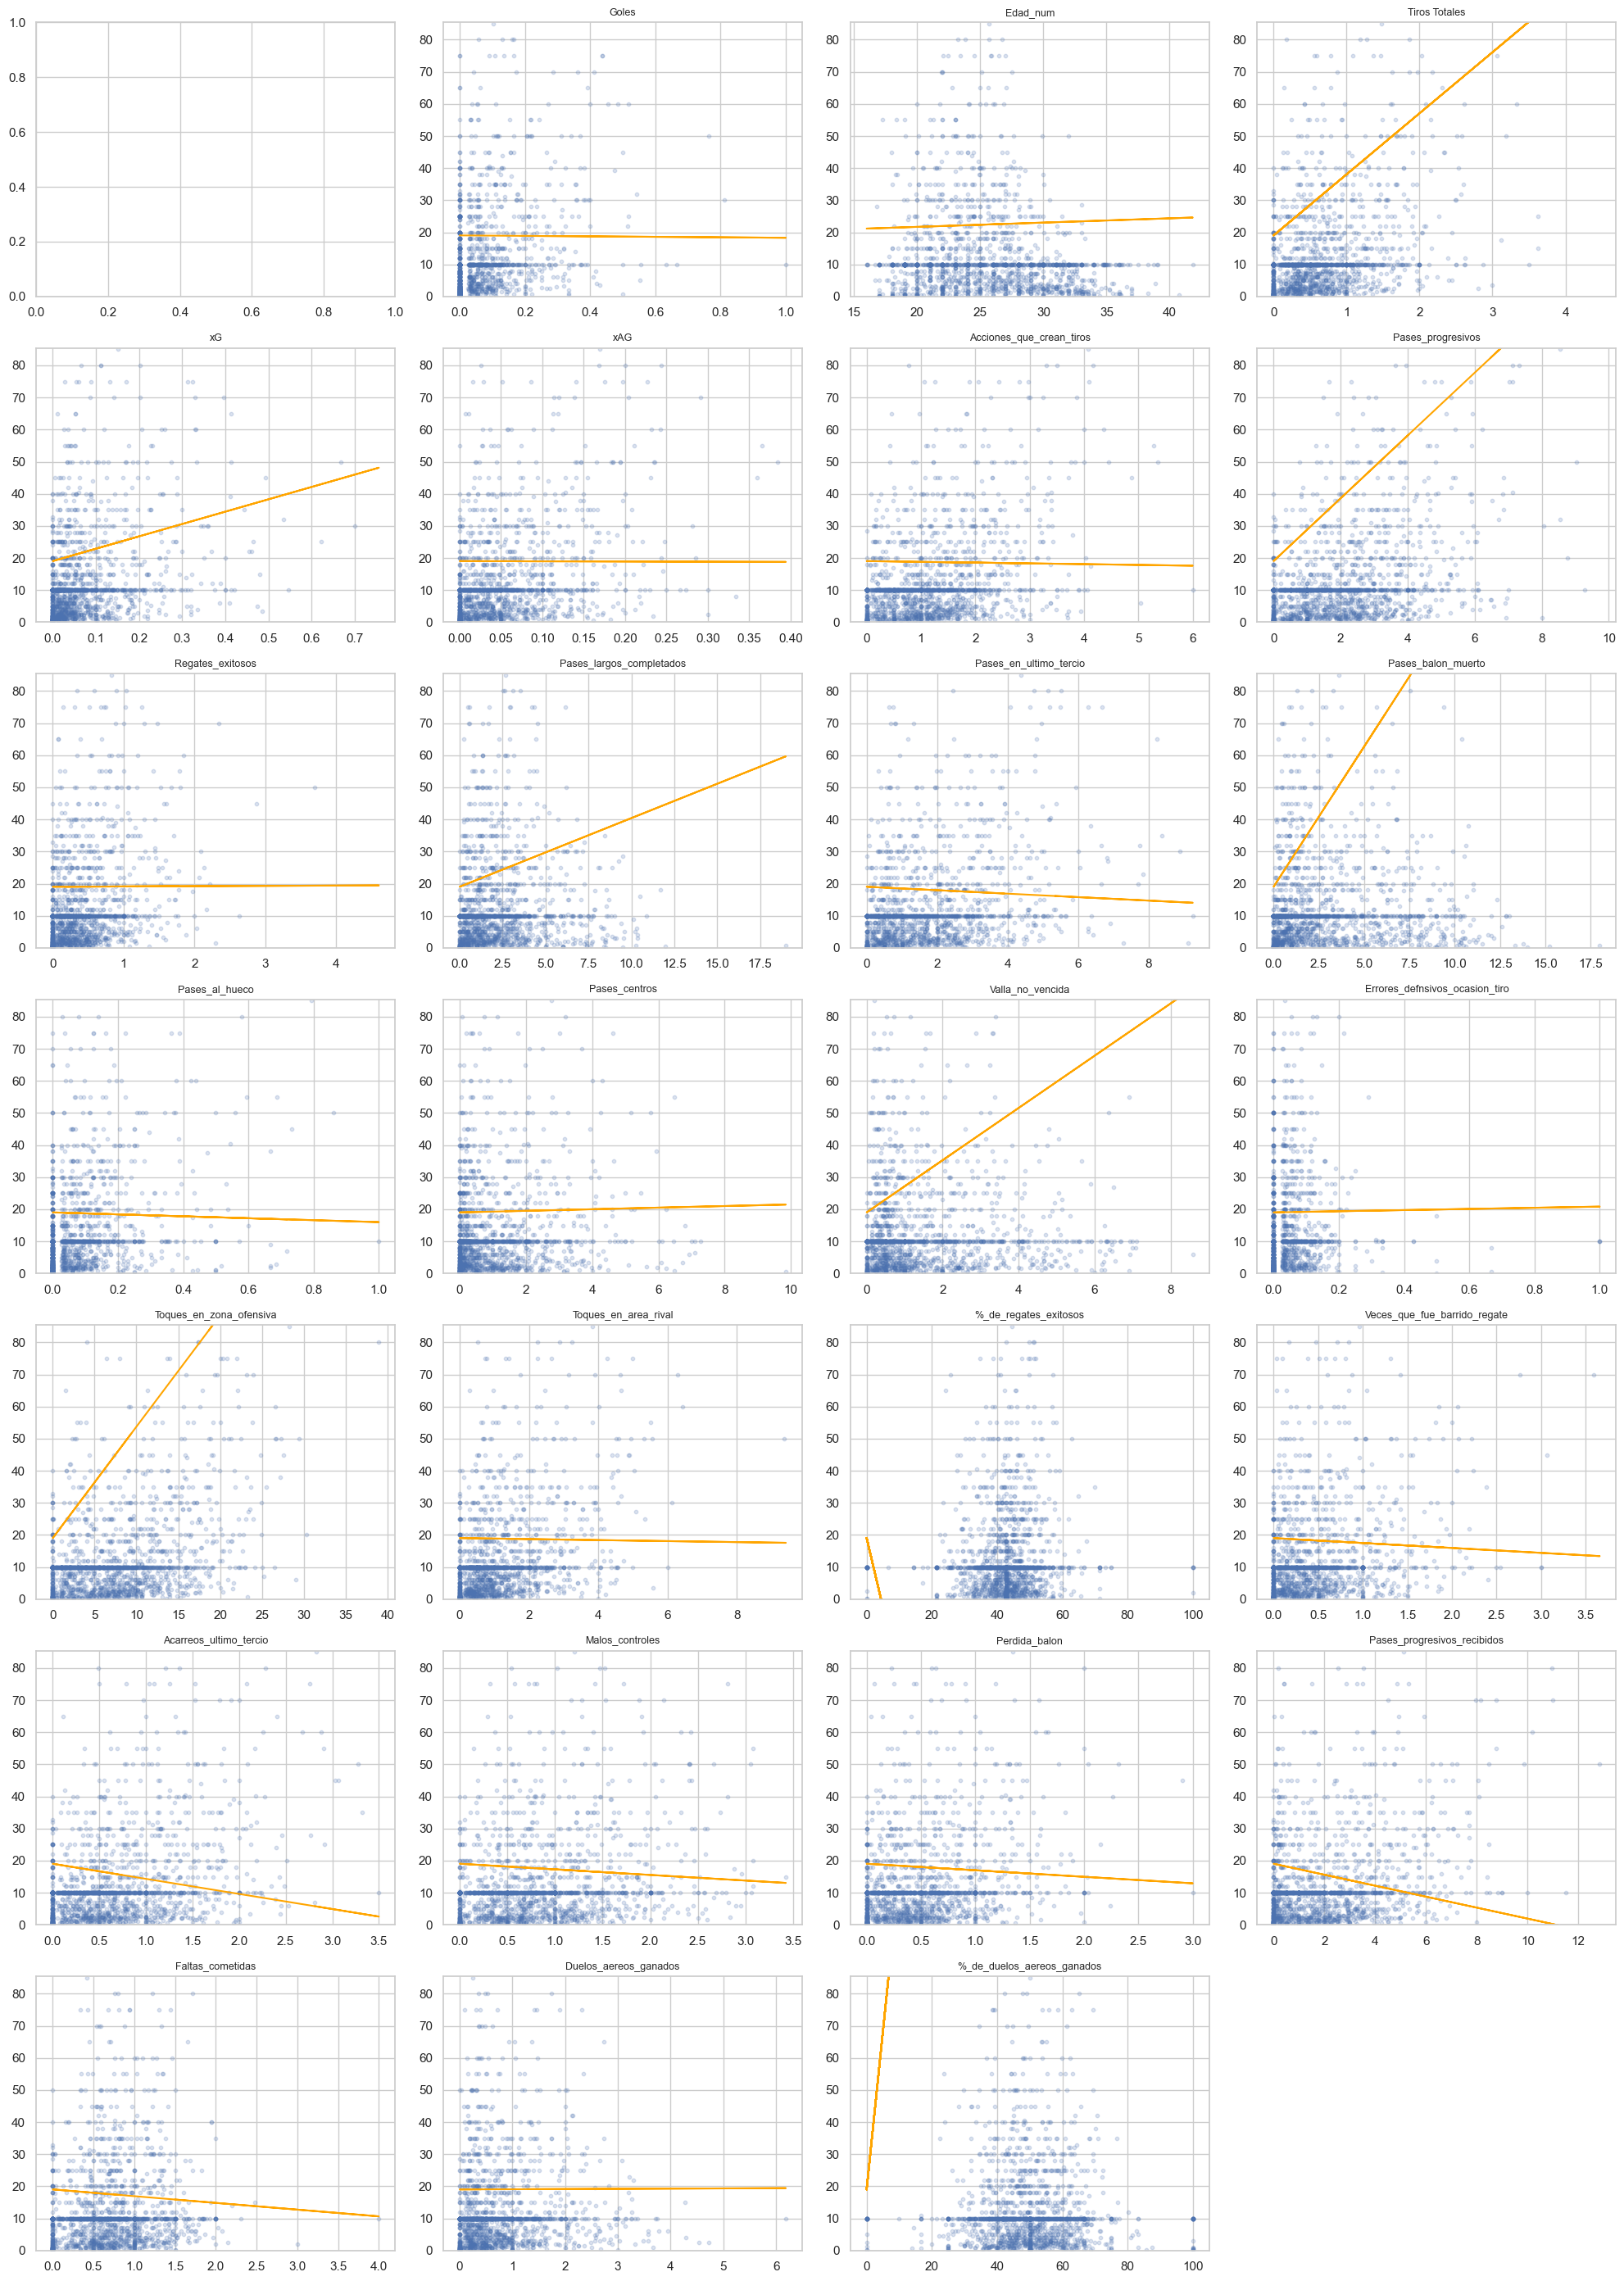

In [62]:
import math

n_features = len(variables_modelo)
n_cols = 4   # cuántos gráficos por fila
n_rows = math.ceil(n_features / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4), sharey=False)
axs = axs.flatten()  # convertir matriz de ejes en lista

for i, col in enumerate(variables_modelo):
    if col != "Posicion_moda":
        x = X_train[col]
        m = regression.coef_[i]
        b = regression.intercept_
        
        # Puntos reales
        axs[i].scatter(x, y_train, alpha=0.2, s=10)
        # Línea de regresión
        axs[i].plot(x, x*m + b, color="orange")
        axs[i].set_title(col, fontsize=9)
        
        # Ajustar ejes Y automáticamente al 99% de los datos
        y_max = np.percentile(y_train, 99)
        axs[i].set_ylim(0, y_max)

# Apagar los ejes vacíos si sobran
for j in range(i+1, len(axs)):
    axs[j].axis("off")

plt.tight_layout()
plt.show()

## 6.2 Evaluación del modelo

In [64]:
print("LinearRegression ---")
mse_train = mean_squared_error(y_train_basic, y_pred_train_basic)
mse_test  = mean_squared_error(y_test_basic, y_pred_test_basic)
print("MAE train:", mse_train)
print("MAE test :", mse_test, "\n")
print("RMSE train:", np.sqrt(mse_train))
print("RMSE test :", np.sqrt(mse_test), "\n")
print("R² train:", r2_score(y_train_basic, y_pred_train_basic))
print("R² test :", r2_score(y_test_basic, y_pred_test_basic))


LinearRegression ---
MAE train: 169.28161912251787
MAE test : 115.18083972486227 

RMSE train: 13.010826996102818
RMSE test : 10.732233678263919 

R² train: 0.4356425934845485
R² test : 0.39917275112342965


El modelo no presenta un sobreajuste significativo, pues los resultados de entrenamiento y prueba son consistentes. Su desempeño es aceptable aunque limitado, ya que explica aproximadamente el 40% de la varianza y presenta un error promedio cercano a los 8 millones. No obstante, se evidencian outliers que incrementan el RMSE y reflejan que el modelo no logra predecir con precisión los valores de mercado extremos de algunos jugadores. 

# 7. Segundo modelo de regresión: Ridge (con Pipeline)

## 7.1 Planteamiento del Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

num_features = [col for col in variables_modelo if col != "Posicion_moda"]
cat_features = ["Posicion_moda"]

numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("winsor",  SafeIQRWinsorizer(k=3.0, cap_lower=False, cap_upper=True)),
    ("scaler",  StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_features),
        ("cat", categorical_pipeline, cat_features),
    ]
)

model_pipe = Pipeline(steps=[
    ("preprocessor", preprocess),
    ("model", Ridge(alpha=1.0))
])


## 7.2 Creación del modelo Ridge

In [44]:
model_pipe.fit(X_train, y_train)

y_pred_train = model_pipe.predict(X_train)
y_pred_test  = model_pipe.predict(X_test)


## 7.3 Evaluación del modelo Ridge

In [75]:
print("Ridge ---")
print("R² train:", r2_score(y_train, y_pred_train))
print("R² test :", r2_score(y_test, y_pred_test))
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test  = mean_squared_error(y_test, y_pred_test)
print("MAE train:", mse_train)
print("MAE test :", mse_test)
print("RMSE train:", np.sqrt(mse_train))
print("RMSE test :", np.sqrt(mse_test))

# Recuperar nombres de features después del preprocesamiento
feature_names_num = num_features
feature_names_cat = list(
    model_pipe.named_steps["preprocessor"]
    .named_transformers_["cat"]
    .named_steps["ohe"]
    .get_feature_names_out(cat_features)
)

feature_names = feature_names_num + feature_names_cat

# Recuperar coeficientes del modelo Ridge
coefs = model_pipe.named_steps["model"].coef_

coef_df_ridge = pd.DataFrame({
    "Variable": feature_names,
    "Coeficiente": coefs
}).sort_values(by="Coeficiente", key=abs, ascending=False)

display(coef_df_ridge.head(15))


Ridge ---
R² train: 0.41887112455193753
R² test : 0.39308480717014127
MAE train: 174.3122989420759
MAE test : 116.34792144102742
RMSE train: 13.202738312262191
RMSE test : 10.786469368659397


Variable  Coeficiente
15      Toques_en_zona_ofensiva    12.015170
31             Posicion_moda_GK    10.619435
26             Posicion_moda_AM    -5.441045
27             Posicion_moda_CB     5.052401
12                Pases_centros    -4.448772
1                      Edad_num    -3.490322
28             Posicion_moda_CM    -3.195813
22  Pases_progresivos_recibidos    -3.057437
9        Pases_en_ultimo_tercio     2.889835
4                           xAG     2.633709
3                            xG     2.564638
20              Malos_controles    -2.426099
7              Regates_exitosos     2.363109
36             Posicion_moda_RM    -2.094632
16         Toques_en_area_rival     2.013909

# 8. Tercer modelo de regresión: Lasso (con Pipeline)

## 8.1 Planteamiento del Pipeline

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# 1) Construir pipeline con normalización + Lasso
numeric_pipe = Pipeline([
    ("scaler", StandardScaler()), 
    ("lasso", Lasso(alpha=1.0, random_state=42, max_iter=10000))
])

categorical_pipeline = Pipeline([
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_features),
        ("cat", categorical_pipeline, cat_features),
    ]
)

lasso_pipe = Pipeline([
    ("preprocessor", preprocess),
    ("lasso", Lasso(alpha=1.0, random_state=42, max_iter=10000))
])

## 8.2 Creación del modelo Lasso

In [47]:
# 2) Ajustar el pipeline
lasso_pipe.fit(X_train, y_train)

# 3) R² en train y test
r2_train = lasso_pipe.score(X_train, y_train)
r2_test  = lasso_pipe.score(X_test, y_test)

# 4) Predicciones
y_train_pred = lasso_pipe.predict(X_train)
y_test_pred  = lasso_pipe.predict(X_test)

# 5) Métricas de error
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test  = mean_absolute_error(y_test, y_test_pred)

rmse_train = mean_squared_error(y_train, y_train_pred)  # RMSE
rmse_test  = mean_squared_error(y_test, y_test_pred)

## 8.3 Evaluación del modelo Lasso

In [67]:
print("Lasso Regression ---")
print("R² train:", r2_train)
print("R² test :", r2_test, "\n")
print("MAE train:", mae_train)
print("MAE test :", mae_test, "\n")
print("RMSE train:", rmse_train)
print("RMSE test :", rmse_test)

# 6) Obtener nombres de las features después del preprocess
feature_names_num = num_features
feature_names_cat = list(
    lasso_pipe.named_steps["preprocessor"]
    .named_transformers_["cat"]
    .named_steps["ohe"]
    .get_feature_names_out(cat_features)
)

# 7) Concatenar numéricas + categóricas
feature_names = feature_names_num + feature_names_cat

# Recuperar coeficientes del modelo Ridge
coefs = lasso_pipe.named_steps["lasso"].coef_

coef_df_ridge = pd.DataFrame({
    "Variable": feature_names,
    "Coeficiente": coefs
}).sort_values(by="Coeficiente", key=abs, ascending=False)

display(coef_df_ridge.head(15))


Lasso Regression ---
R² train: 0.3228806053065263
R² test : 0.33685168351256745 

MAE train: 8.65355629428717
MAE test : 7.789597119075773 

RMSE train: 203.10509997680379
RMSE test : 127.12802240239702


Variable  Coeficiente
9           Pases_en_ultimo_tercio     2.507748
16            Toques_en_area_rival     2.310154
1                         Edad_num    -2.160697
0                            Goles     1.896552
4                              xAG     1.833503
11                  Pases_al_hueco     1.302170
15         Toques_en_zona_ofensiva     1.046092
8         Pases_largos_completados     0.729708
3                               xG     0.714559
12                   Pases_centros    -0.403395
6                Pases_progresivos     0.251718
23                Faltas_cometidas    -0.128795
14  Errores_defnsivos_ocasion_tiro     0.115906
5         Acciones_que_crean_tiros     0.000000
2                    Tiros Totales     0.000000

El modelo lineal presenta un poder explicativo limitado, ya que solo alcanza a explicar cerca del 34% de la variabilidad del valor de mercado de los jugadores, lo que refleja que este depende en gran medida de otros factores externos no incluidos en el conjunto de datos, como la nacionalidad, la liga, la popularidad mediática o la trayectoria contractual. Los errores medios son consistentes en entrenamiento y prueba, con un MAE cercano a los 8 millones, lo que indica que el modelo no está sobreajustado; sin embargo, la diferencia marcada entre el MAE y el RMSE confirma la existencia de outliers que afectan fuertemente las predicciones en jugadores con valores de mercado extremos. En cuanto a los coeficientes, se observa que variables ofensivas como los toques en el área rival, los pases en el último tercio, los goles y los pases al hueco incrementan significativamente el valor estimado, mientras que la edad tiene un efecto negativo importante, reduciendo el valor de mercado en aproximadamente dos millones por cada año adicional.

# 9. Exploración y conclusión sobre los supuestos de la regresión

Se evalua:
- Linealidad
- Normalidad de residuos
- Homoscedasticidad
- Independencia
- No multicolinealinealidad excesiva

## 9.1 Linealidad

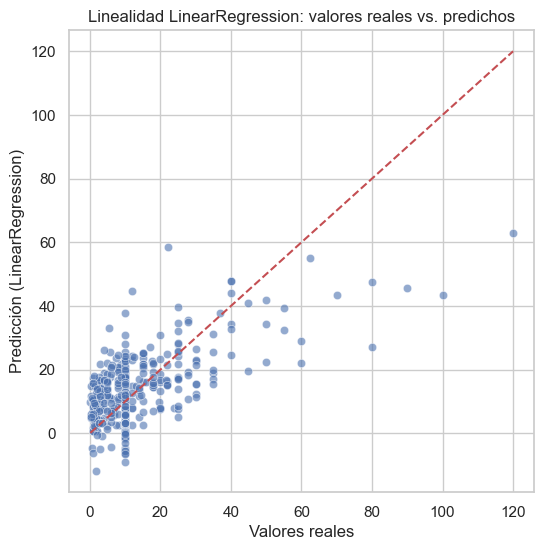

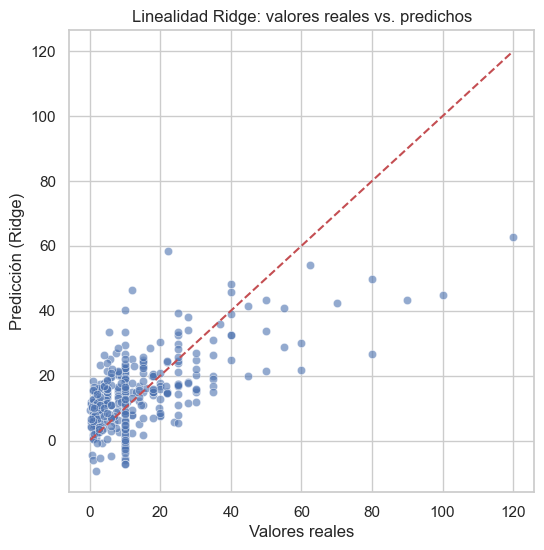

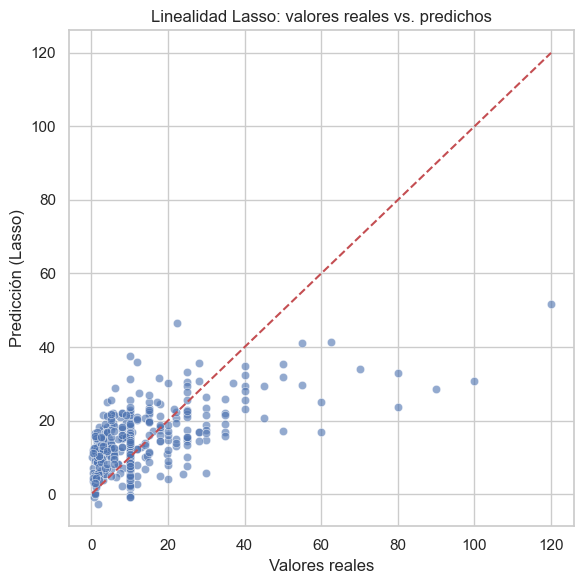

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo LinearRegression
y_pred_lr = regression.predict(X_test_basic)
residuals_lr = y_test_basic - y_pred_lr

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_basic, y=y_pred_lr, alpha=0.6)
plt.plot([y_test_basic.min(), y_test_basic.max()], [y_test_basic.min(), y_test_basic.max()], 'r--')  # línea ideal
plt.xlabel("Valores reales")
plt.ylabel("Predicción (LinearRegression)")
plt.title("Linealidad LinearRegression: valores reales vs. predichos")

# Modelo Ridge
y_pred_ridge = model_pipe.predict(X_test)
residuals_ridge = y_test - y_pred_ridge

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.xlabel("Valores reales")
plt.ylabel("Predicción (Ridge)")
plt.title("Linealidad Ridge: valores reales vs. predichos")

# Modelo Lasso
y_pred_lasso = lasso_pipe.predict(X_test)
residuals = y_test - y_pred_lasso

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_lasso, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.xlabel("Valores reales")
plt.ylabel("Predicción (Lasso)")
plt.title("Linealidad Lasso: valores reales vs. predichos")

plt.tight_layout()
plt.show()



## 9.2 Normalidad de residuos

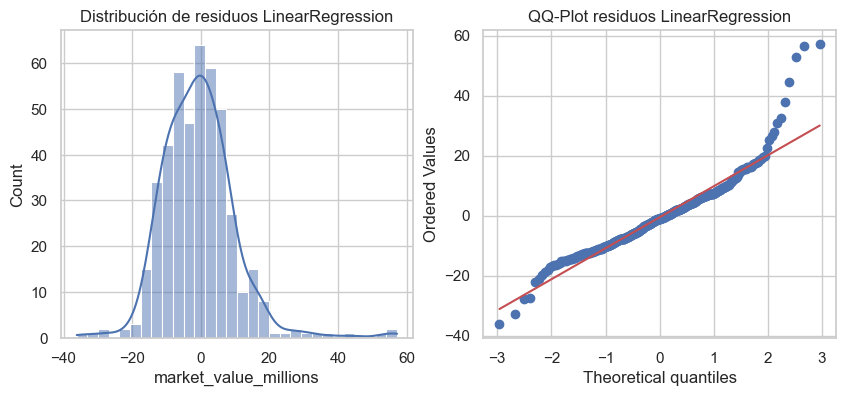

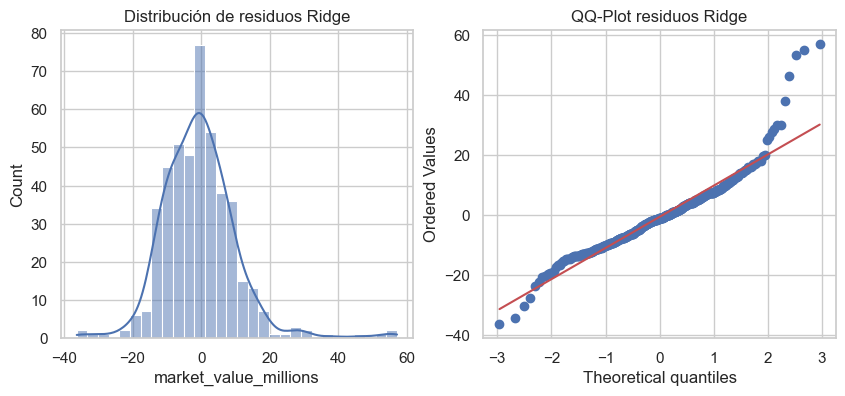

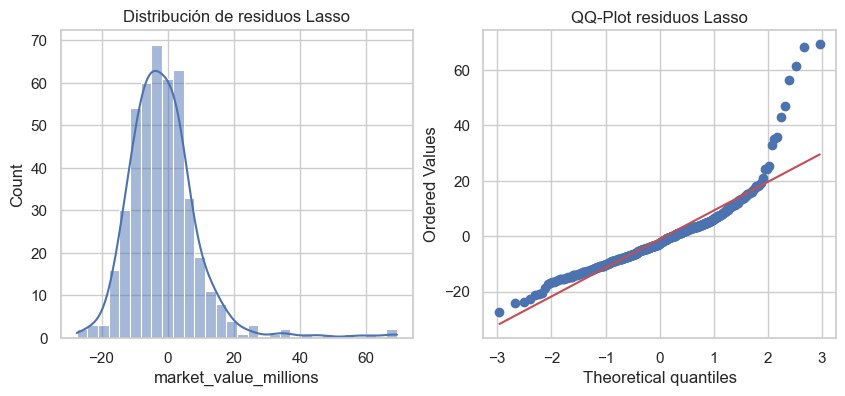

In [68]:
import seaborn as sns
import scipy.stats as stats
# Modelo LinearRegression
residuos_basic = y_test_basic - y_pred_test_basic

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(residuos_basic, kde=True, bins=30)
plt.title("Distribución de residuos LinearRegression")

plt.subplot(1,2,2)
stats.probplot(residuos_basic, dist="norm", plot=plt)
plt.title("QQ-Plot residuos LinearRegression")

# Modelo Ridge
residuos_ridge = y_test - y_pred_ridge

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(residuos_ridge, kde=True, bins=30)
plt.title("Distribución de residuos Ridge")

plt.subplot(1,2,2)
stats.probplot(residuos_ridge, dist="norm", plot=plt)
plt.title("QQ-Plot residuos Ridge")

# Modelo Lasso
residuos_lasso = y_test - y_pred_lasso

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(residuos_lasso, kde=True, bins=30)
plt.title("Distribución de residuos Lasso")

plt.subplot(1,2,2)
stats.probplot(residuos_lasso, dist="norm", plot=plt)
plt.title("QQ-Plot residuos Lasso")
plt.show()


Los tres modelos presentan comportamientos similares tanto en la distribución de residuos como el QQ-Plot, donde tienden a normalizarse pero pierden precisión con colas muy grandes a la derecha.

Los mejores ajustes los tienen LinearRegression y Ridge, dado que Lasso presenta mayores peso en la cola derecha y que se puede explicar por la eliminación de variables que puede estar haciendo el modelo.

## 9.3 Homoscedasticidad

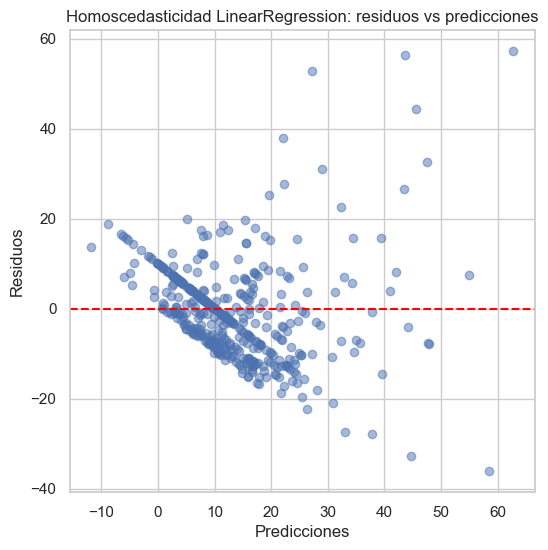

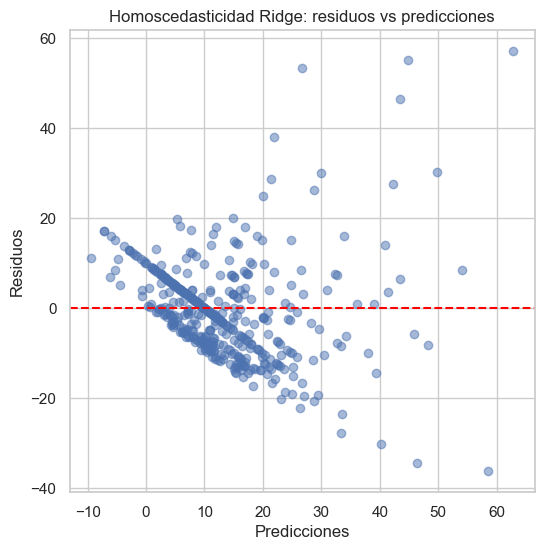

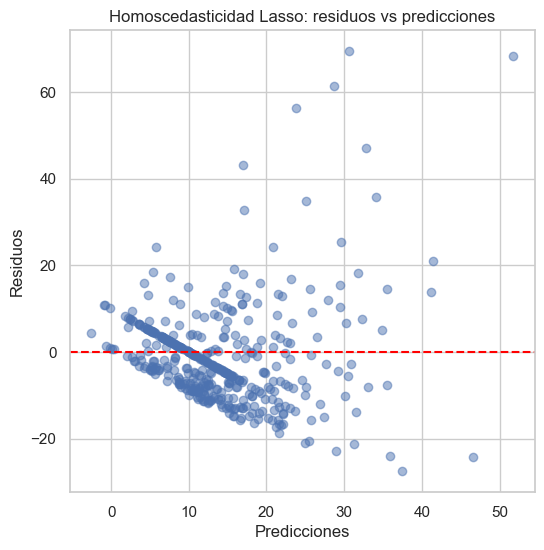

In [69]:
# Modelo LinearRegression
plt.figure(figsize=(6,6))
plt.scatter(y_pred_test_basic, residuos_basic, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Homoscedasticidad LinearRegression: residuos vs predicciones")

# Modelo Ridge
plt.figure(figsize=(6,6))
plt.scatter(y_pred_ridge, residuos_ridge, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Homoscedasticidad Ridge: residuos vs predicciones")

# Modelo Lasso
plt.figure(figsize=(6,6))
plt.scatter(y_pred_lasso, residuos_lasso, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Homoscedasticidad Lasso: residuos vs predicciones")
plt.show()


Con el análisis de homoscedasticidad, se puede evidenciar que ninguno de los modelos cumple con el supuesto y presentan comportamientos de heteroscedasticidad, que se evidencian con mayor dispersión de residuos para predicciones más altas. Esto puede afectar directamente a la validez de los intervalos de confianza y tests de significancia.

## 9.4 Independencia

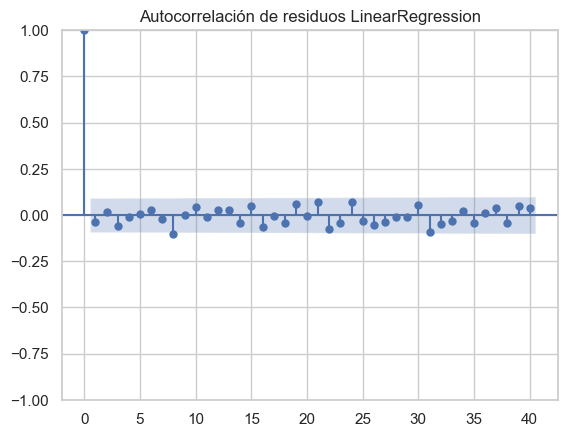

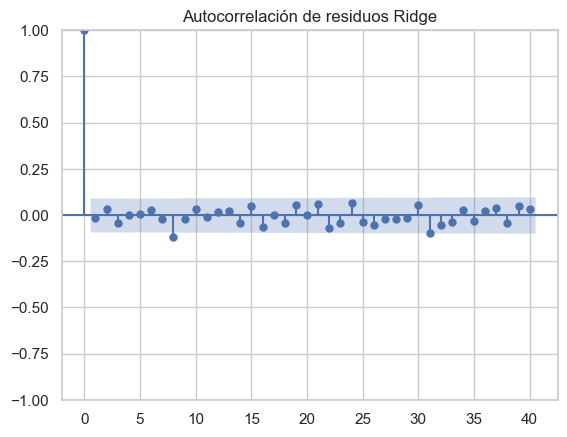

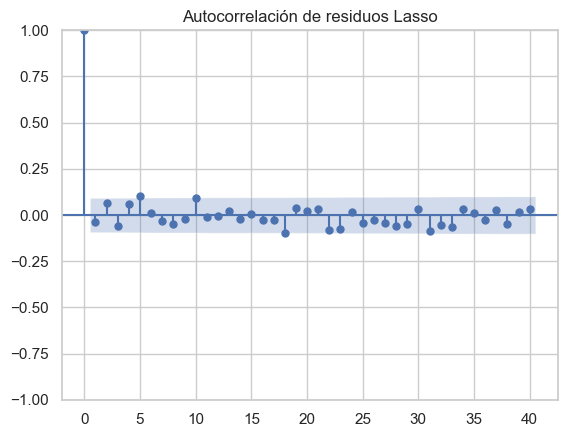

In [70]:
from statsmodels.graphics.tsaplots import plot_acf

# Modelo LinearRegression
plot_acf(residuos_basic, lags=40)
plt.title("Autocorrelación de residuos LinearRegression")

# Modelo Ridge
plot_acf(residuos_ridge, lags=40)
plt.title("Autocorrelación de residuos Ridge")

# Modelo Lasso
plot_acf(residuos_lasso, lags=40)
plt.title("Autocorrelación de residuos Lasso")

plt.show()


En términos generales se puede establecer que, al tener valores dentro de la banda azul (intervalo de confianza 95%), la independencia se cumple en los tres modelos y que los errores entre variables son independientes.

## 9.5 No multicolinealidad excesiva

De acuerdo con el análisis de Factor de Inflación de la Varianza (VIF)

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(X: pd.DataFrame):
    """Calcula VIF para un DataFrame numérico limpio"""
    # Convertir a float y eliminar NaN
    X_clean = X.astype(float).dropna(axis=0)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_clean.columns
    vif_data["VIF"] = [
        variance_inflation_factor(X_clean.values, i)
        for i in range(X_clean.shape[1])
    ]
    return vif_data.sort_values(by="VIF", ascending=False)

# --- Modelo LinearRegression (con dummies) ---
print("VIF - LinearRegression")
vif_basic = compute_vif(X_train_basic)
display(vif_basic.head(10))

# --- Modelo Ridge ---
print("VIF - Ridge")
vif_ridge = compute_vif(X_train[num_features])  # solo numéricas originales
display(vif_ridge.head(10))

# --- Modelo Lasso ---
print("VIF - Lasso")
vif_lasso = compute_vif(X_train[num_features])  # igual, solo numéricas originales
display(vif_lasso.head(10))


VIF - LinearRegression


Variable        VIF
15      Toques_en_zona_ofensiva  53.600622
17        %_de_regates_exitosos  34.784154
6             Pases_progresivos  31.179201
1                      Edad_num  30.630178
5      Acciones_que_crean_tiros  23.296399
9        Pases_en_ultimo_tercio  20.694300
25   %_de_duelos_aereos_ganados  19.599508
22  Pases_progresivos_recibidos  19.333534
16         Toques_en_area_rival  18.140748
2                 Tiros Totales  13.936265

VIF - Ridge


Variable        VIF
15      Toques_en_zona_ofensiva  49.459674
17        %_de_regates_exitosos  32.016245
6             Pases_progresivos  30.278361
1                      Edad_num  28.657806
5      Acciones_que_crean_tiros  22.500421
9        Pases_en_ultimo_tercio  19.922345
25   %_de_duelos_aereos_ganados  18.084166
22  Pases_progresivos_recibidos  17.938807
16         Toques_en_area_rival  17.427313
2                 Tiros Totales  13.592050

VIF - Lasso


Variable        VIF
15      Toques_en_zona_ofensiva  49.459674
17        %_de_regates_exitosos  32.016245
6             Pases_progresivos  30.278361
1                      Edad_num  28.657806
5      Acciones_que_crean_tiros  22.500421
9        Pases_en_ultimo_tercio  19.922345
25   %_de_duelos_aereos_ganados  18.084166
22  Pases_progresivos_recibidos  17.938807
16         Toques_en_area_rival  17.427313
2                 Tiros Totales  13.592050

De acuerdo con los resultados, todo los modelos presentan multicolinealidades muy severas (>10 es preocupante, >30 es severo). Los modelos Ridge y Lasso mejoran esta métrica al anular coeficientes o eliminar variables irrelevantes, sin embargo necesita de una revisión para llevar estos valores a rangos razonables.

## 9.6 Conclusión modelos

El modelo de regresión lineal es mejor que el Lasso para este problema, porque logra explicar una mayor parte de la variabilidad en el valor de mercado y mantiene errores más bajos en comparación. El modelo Lasso, aunque reduce la complejidad y muestra qué variables son más relevantes, sacrifica demasiada capacidad predictiva.

# 10. Transformaciones complementarias

# 11. Interpretación de coeficientes